# Univariate Analysis on Metabolite Dataset
**Goal:** Identify covariates and other metadata of interest with effect on metabolite dataset

**Dataset:** Metabolite Dataset, Metadata from the CCLE

**Interest:** Covariates with strong relation to metabolite values

**Import necessary packages**

In [53]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style = "whitegrid", rc={'figure.figsize':(10,10),"figure.dpi":300, 'savefig.dpi':300, "font.family":"Futura"})

**Read processed metabolite data (made using ./MetabolitePreprocessing.ipynb and ./MetaDataProcessing.ipynb)**

In [54]:
metabolism_data = pd.read_csv("../Data/Generated Data/processed_metabolite_data.csv")
list_of_cell_lines = metabolism_data.index
#metabolism_data = metabolism_data.set_index("Unnamed: 0")
meta_data = pd.read_csv("../Data/Generated Data/meta_data.csv")

**Reduce dimensionality of Metabolite Data using PCA**

In [55]:
from sklearn.decomposition import PCA
model = PCA(n_components=10)            # 2. Instantiate the model with hyperparameters
model.fit(metabolism_data)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(metabolism_data)
explained_variance = model.explained_variance_ratio_

**Create graph of PC1 vs. PC2 and relation with Tissue Type**

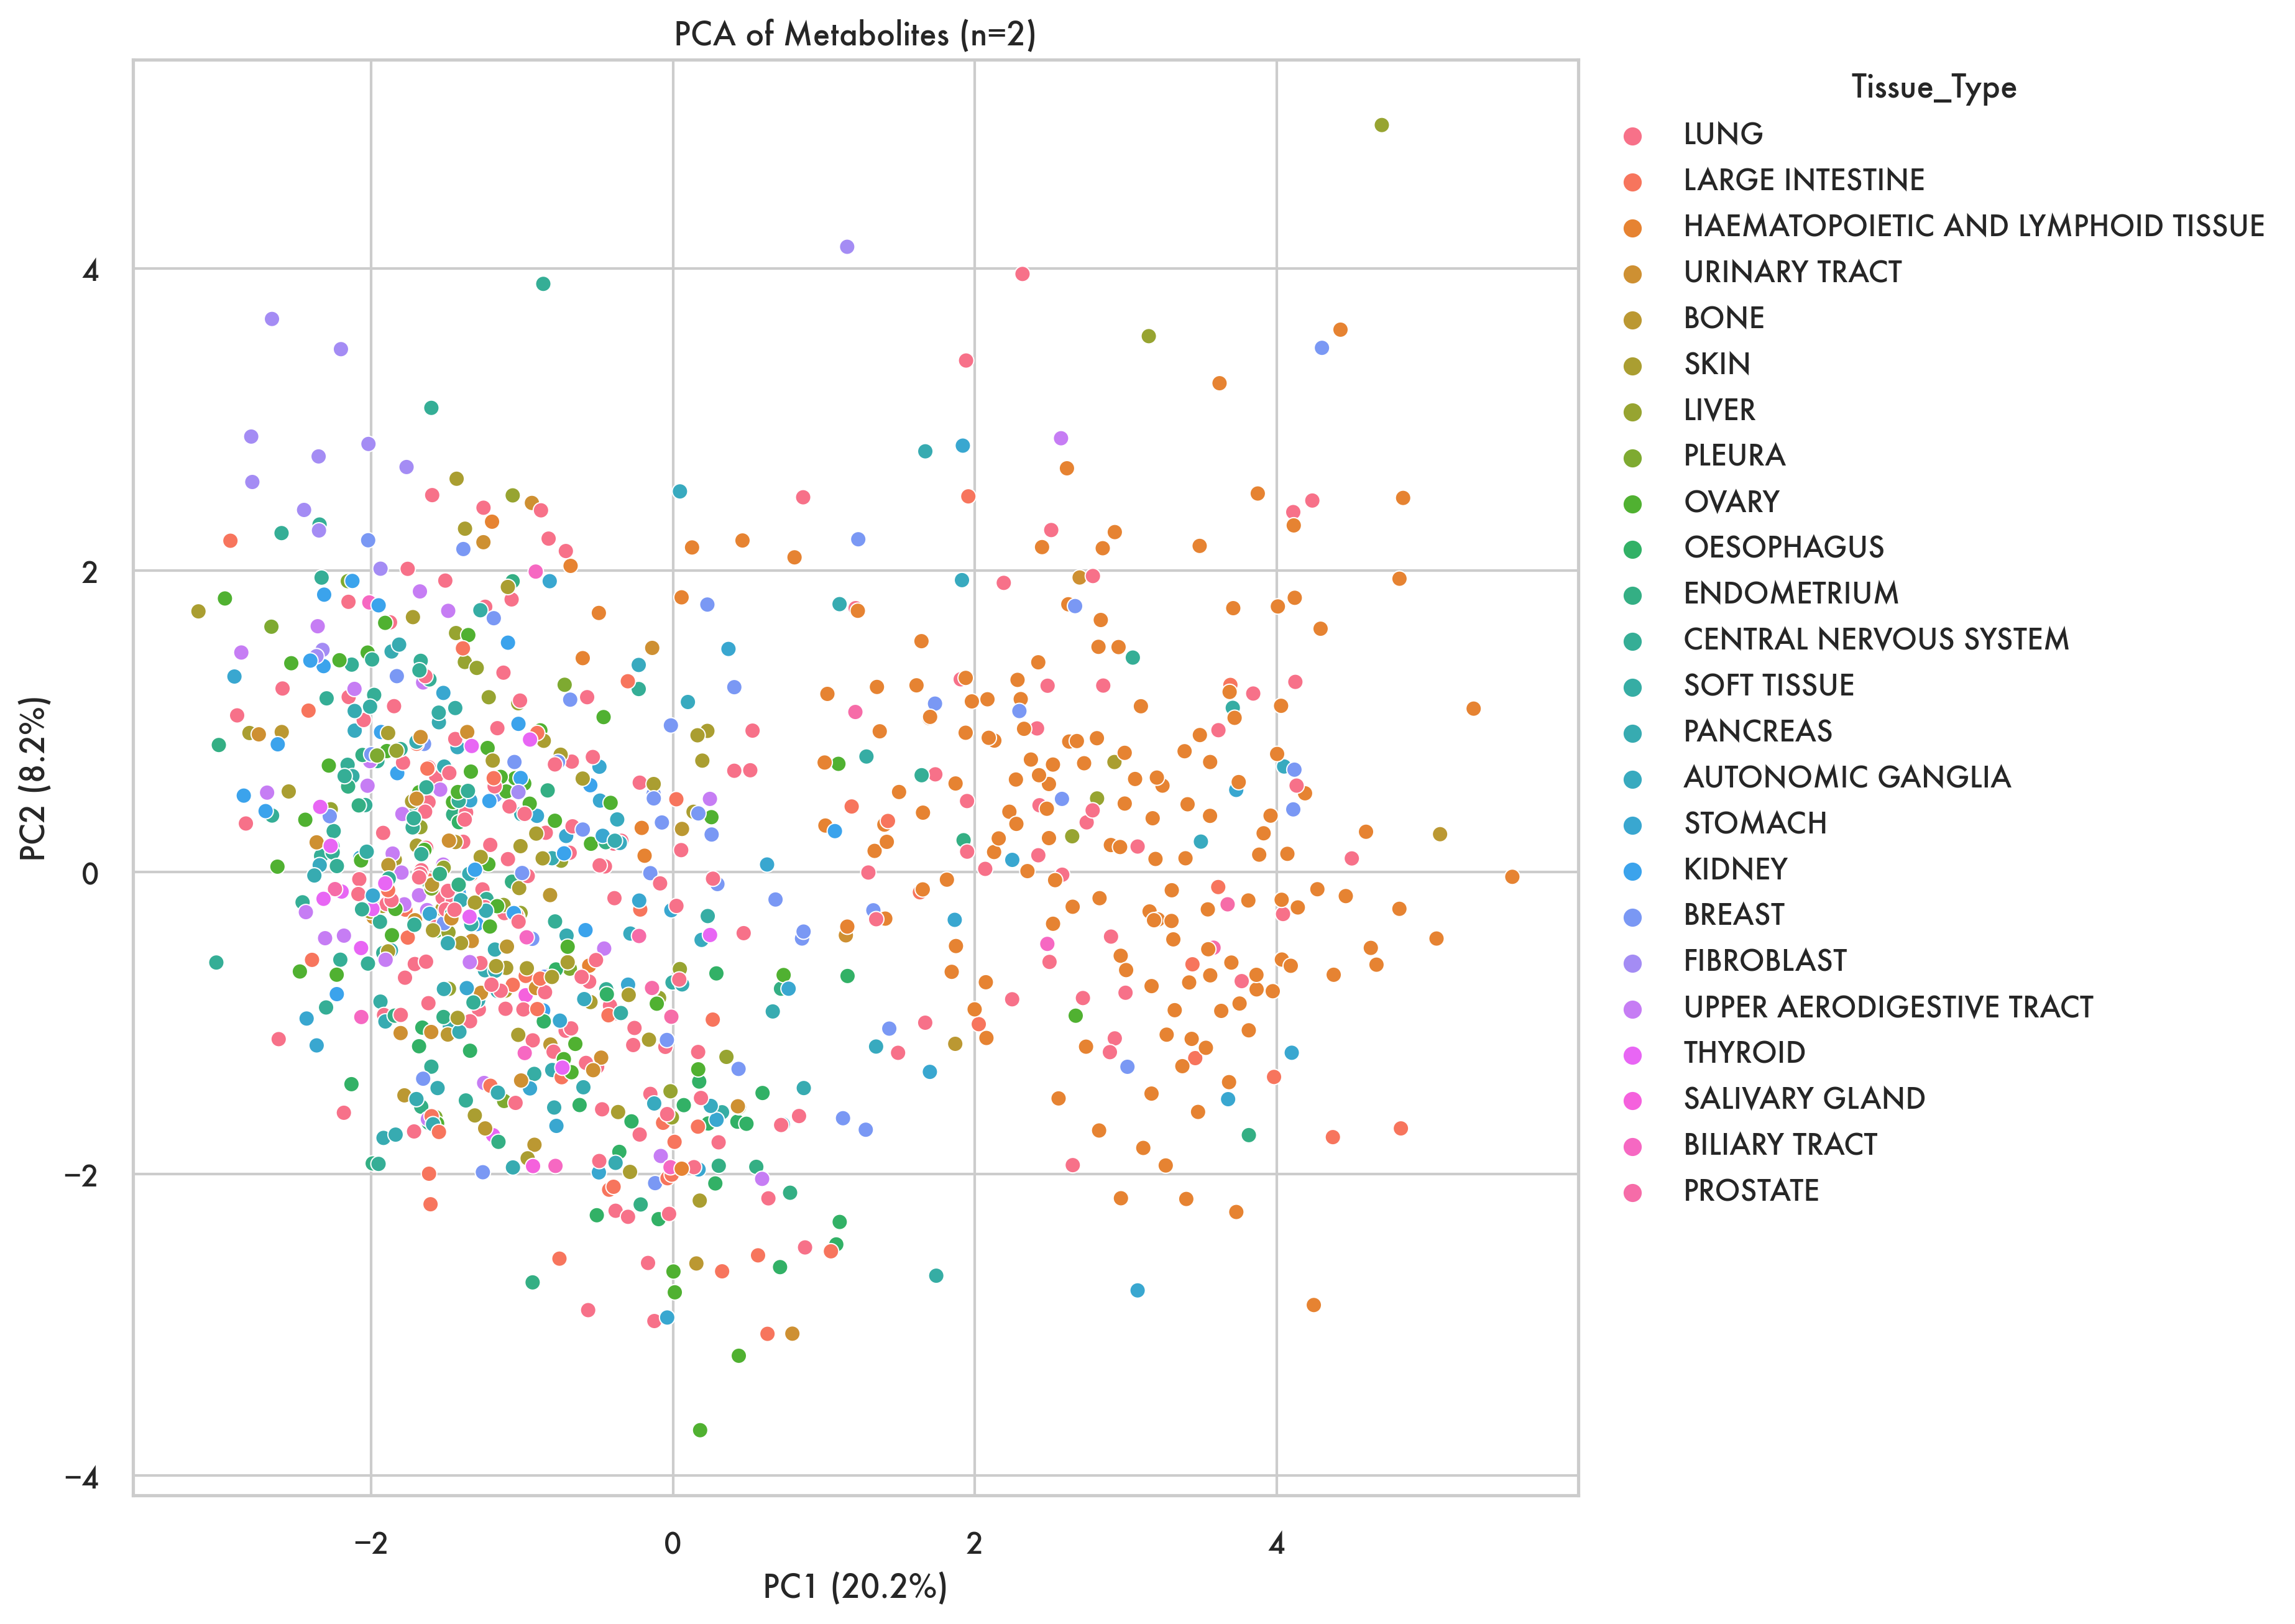

In [56]:
sns.set_theme(style = "whitegrid", rc={'figure.figsize':(10,10),"figure.dpi":300, 'savefig.dpi':300, "font.family":"Futura" })
for x in range(0,5):
    metabolism_data["PC"+ str(x+1)] = X_2D[:, x]
metabolism_data["Tissue_Type"] = [" ".join((x.split("_")[1:])) for x in metabolism_data.index]
fig,axpca = plt.subplots()
scatter = sns.scatterplot(x = "PC1", y = "PC2", data=metabolism_data,hue = "Tissue_Type",legend = "full", sizes= 1).set(title = "PCA of Metabolites (n=2)")
axpca.set(xlabel='PC1 ({}%)'.format(round(explained_variance[0]*100, 1)), ylabel='PC2 ({}%)'.format(round(explained_variance[1]*100, 1)))
sns.move_legend(axpca,"upper left", bbox_to_anchor=(1, 1.01))

**Correlate each PC with available numerical covariate from the metadata and plot R-values in heatmap**

In [111]:
from scipy.stats import pearsonr
meta_variables = ["mutRate", "Doubling.Time.Calculated.hrs"] + list(meta_data.iloc[-55:].index)
number_of_pc = 10
R_df = pd.DataFrame()
for variable in meta_variables:
    meta_data_analysis = meta_data.dropna(axis =1, subset = variable)
    list_of_R = []
    pc_sub = pd.DataFrame(data=  X_2D, index = metabolism_data.index ).loc[meta_data_analysis.columns]
    for PC in pc_sub.columns:
        rho, p = pearsonr(pc_sub[PC], [float(x) for x in meta_data_analysis.loc[variable]])
        list_of_R.append(rho)
    R_df[variable] = list_of_R
R_df = R_df.transpose()
sns.set(font_scale=.5)
sns.heatmap(R_df, cmap = "rainbow")
p_df = pd.DataFrame()
for variable in meta_variables:
    list_of_p = []
    pc_sub = pd.DataFrame(data= X_2D, index = metabolism_data.index ).loc[meta_data_analysis.columns]
    for PC in pc_sub.columns:
        rho, p = pearsonr(pc_sub[PC], [float(x) for x in meta_data_analysis.loc[variable]])
        list_of_p.append(p)
    p_df[variable] = list_of_p
p_df = p_df.transpose()    

KeyError: "['HCC2157_BREAST', 'HS895T_FIBROBLAST', 'HS940T_FIBROBLAST', 'HS739T_FIBROBLAST', 'HUT102_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'HS706T_BONE', 'HS742T_FIBROBLAST', 'SNU1197_LARGE_INTESTINE', 'CAOV4_OVARY', 'HSC3_UPPER_AERODIGESTIVE_TRACT', 'MDAMB436_BREAST', 'HS255T_FIBROBLAST', 'HS675T_FIBROBLAST', 'HS819T_FIBROBLAST', 'MPP89_PLEURA', 'HS840T_FIBROBLAST', 'HS822T_FIBROBLAST', 'HS737T_FIBROBLAST', 'HS616T_FIBROBLAST', 'HS600T_FIBROBLAST', 'TE159T_FIBROBLAST', 'SKLMS1_SOFT_TISSUE', 'HUTU80_SMALL_INTESTINE', 'LN443_CENTRAL_NERVOUS_SYSTEM', 'HMEL_BREAST', 'OELE_OVARY', 'LN235_CENTRAL_NERVOUS_SYSTEM', 'LN428_CENTRAL_NERVOUS_SYSTEM', 'EWS502_BONE', 'SALE_LUNG', 'HCC2814_LUNG', 'TIG3TD_FIBROBLAST', 'SF172_CENTRAL_NERVOUS_SYSTEM', 'PRECLH_PROSTATE', 'U343_CENTRAL_NERVOUS_SYSTEM', 'LN215_CENTRAL_NERVOUS_SYSTEM', 'LN464_CENTRAL_NERVOUS_SYSTEM', 'HEKTE_KIDNEY', 'SLR26_KIDNEY', 'SKRC20_KIDNEY', 'SF767_CERVIX', 'LN319_CENTRAL_NERVOUS_SYSTEM', 'HCC364_LUNG', 'LN382_CENTRAL_NERVOUS_SYSTEM', 'IOMMLEE_CENTRAL_NERVOUS_SYSTEM', 'SLR21_KIDNEY', 'LNZ308_CENTRAL_NERVOUS_SYSTEM', 'LN340_CENTRAL_NERVOUS_SYSTEM', 'HCC827GR5_LUNG', 'SLR20_KIDNEY', 'EW8_BONE', 'UOK101_KIDNEY', 'JHESOAD1_OESOPHAGUS', 'CH157MN_CENTRAL_NERVOUS_SYSTEM', 'RS5_FIBROBLAST', 'HS172T_FIBROBLAST', 'HS834T_FIBROBLAST', 'DM3_FIBROBLAST', 'NALM19_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'HS281T_FIBROBLAST', 'HS343T_FIBROBLAST', 'HS888T_FIBROBLAST'] not in index"

**Plot the p-values of each correlation**

<AxesSubplot: >

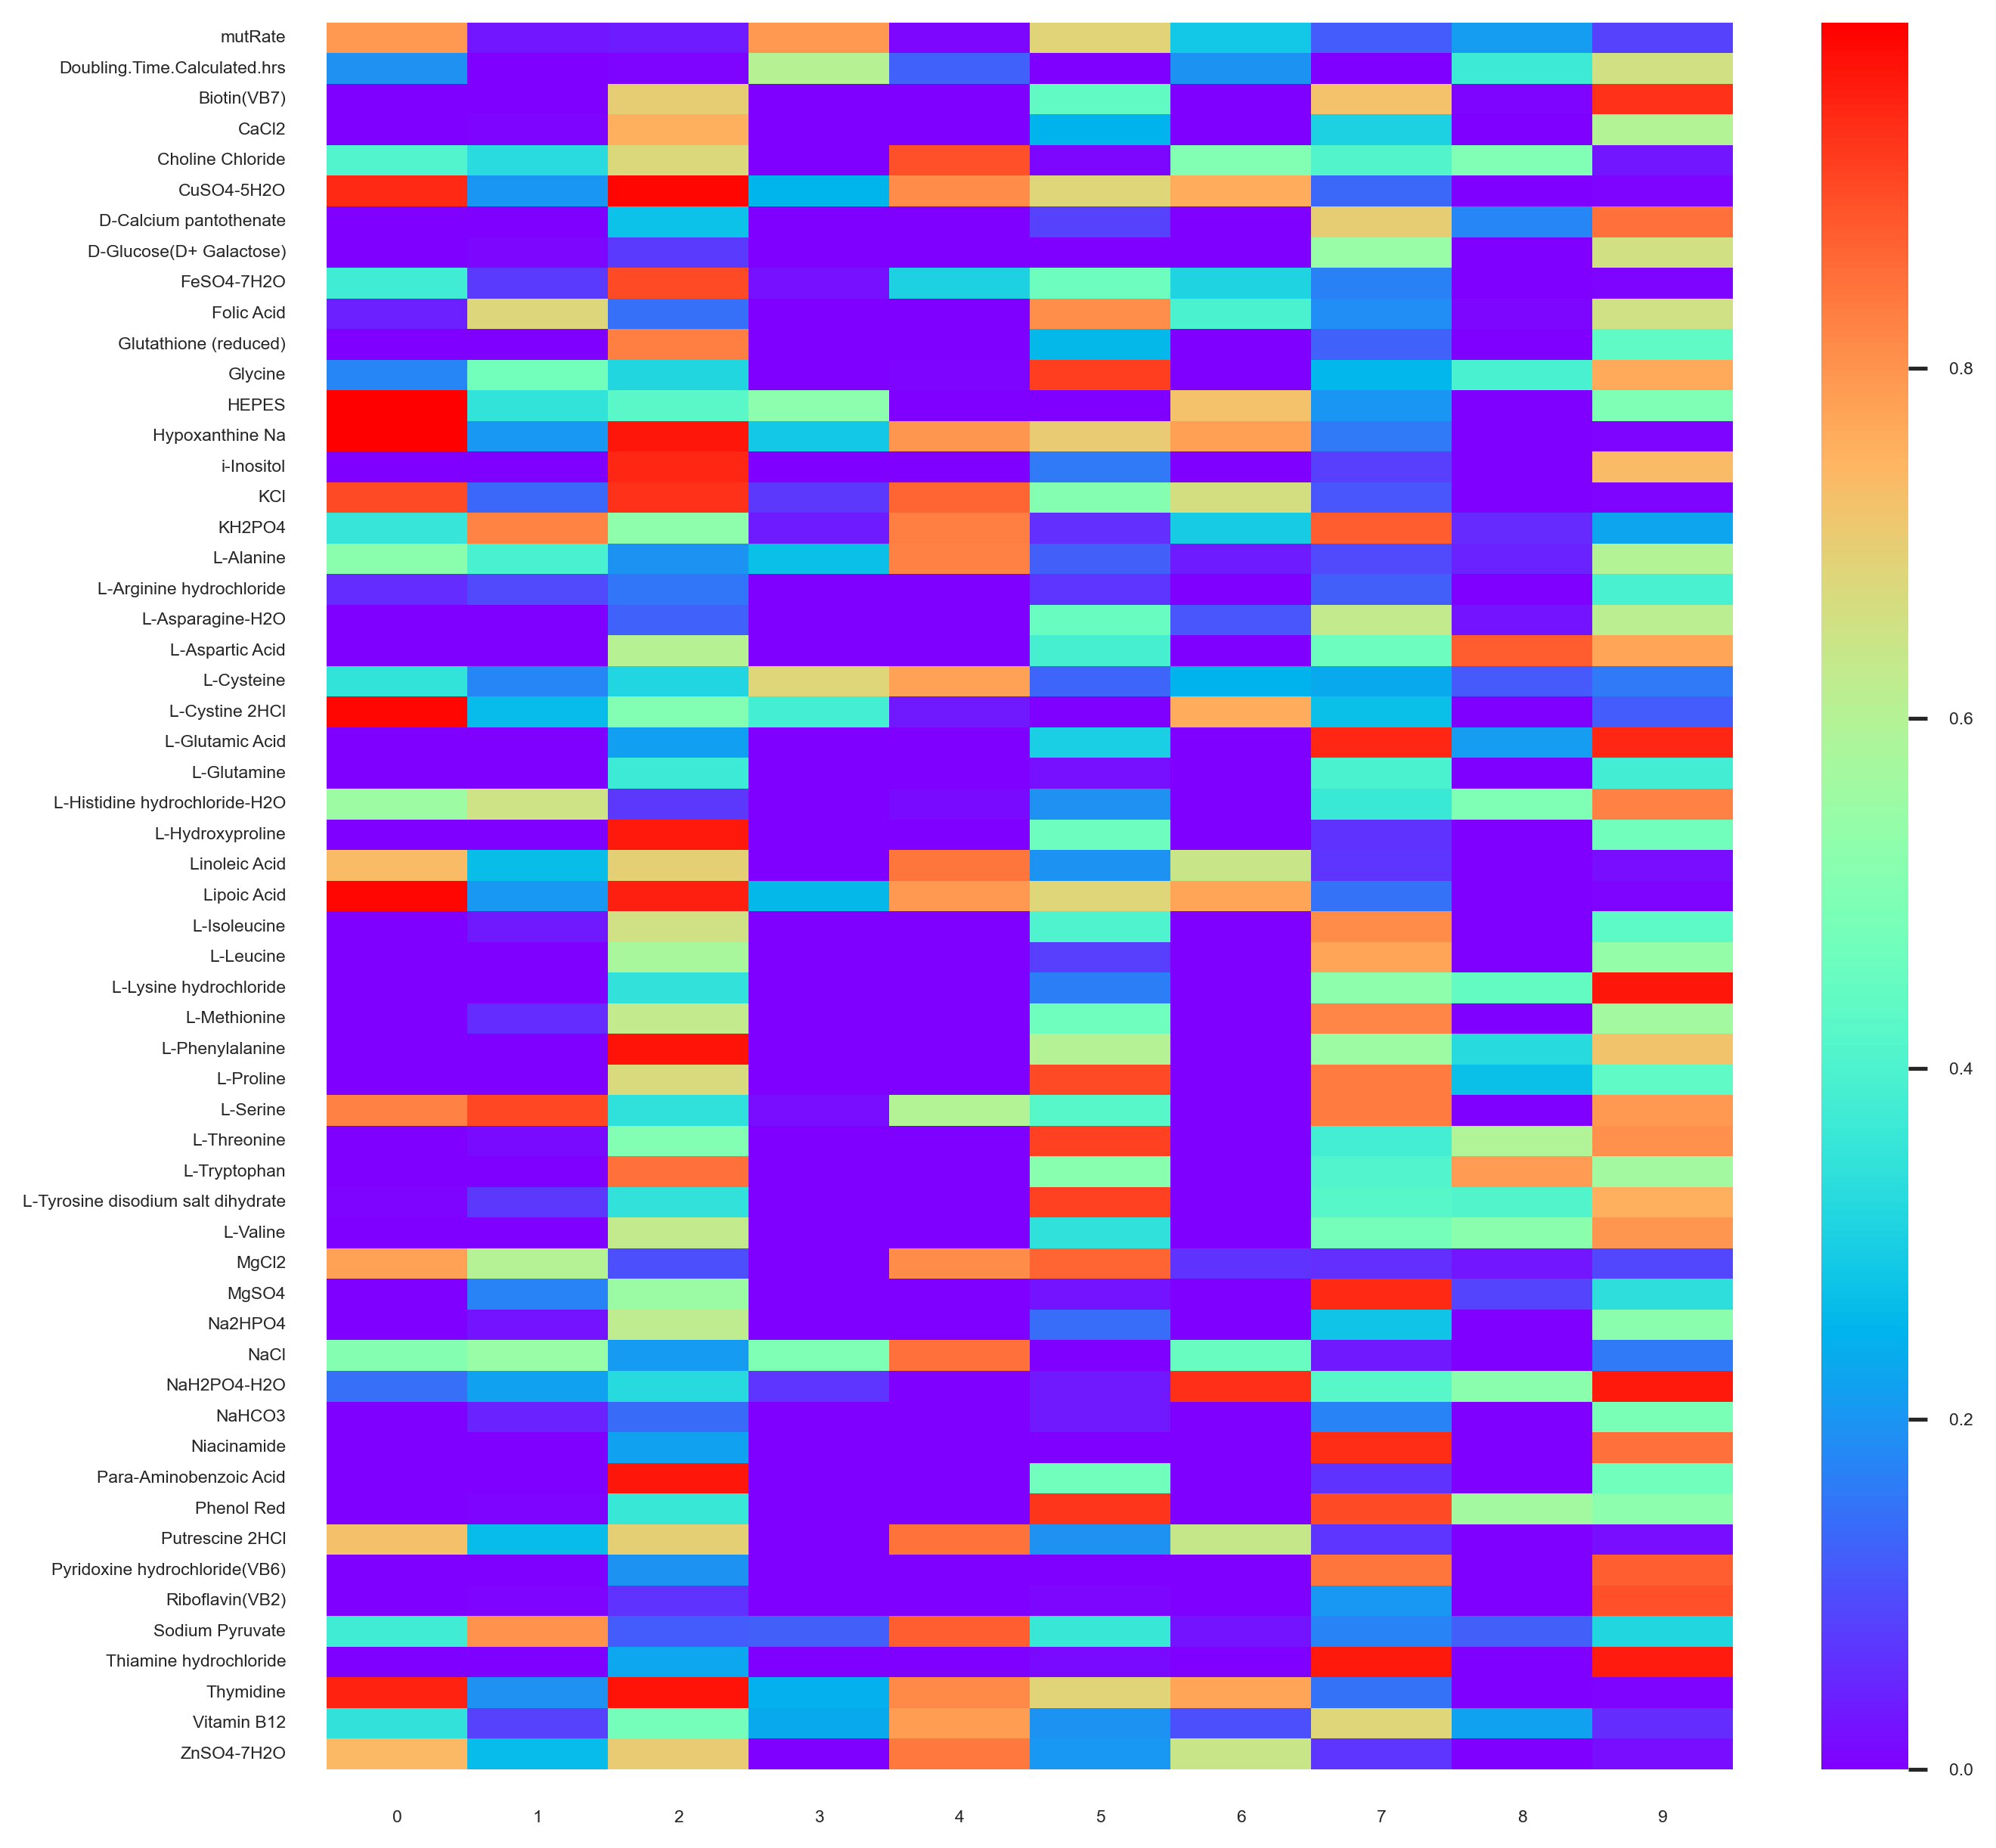

In [58]:
sns.heatmap(p_df, cmap = "rainbow")

**Restrict metabolism data to cell lines with numerical covariates**

In [59]:
metabolism_data_sub = metabolism_data.loc[meta_data_analysis.columns]
metabolism_data_sub["Media"] = meta_data_analysis.loc["Growth.Medium"]

**Plot distributions of PC1 in relation to Tumor Type**

<AxesSubplot: xlabel='PC1', ylabel='Tissue_Type'>

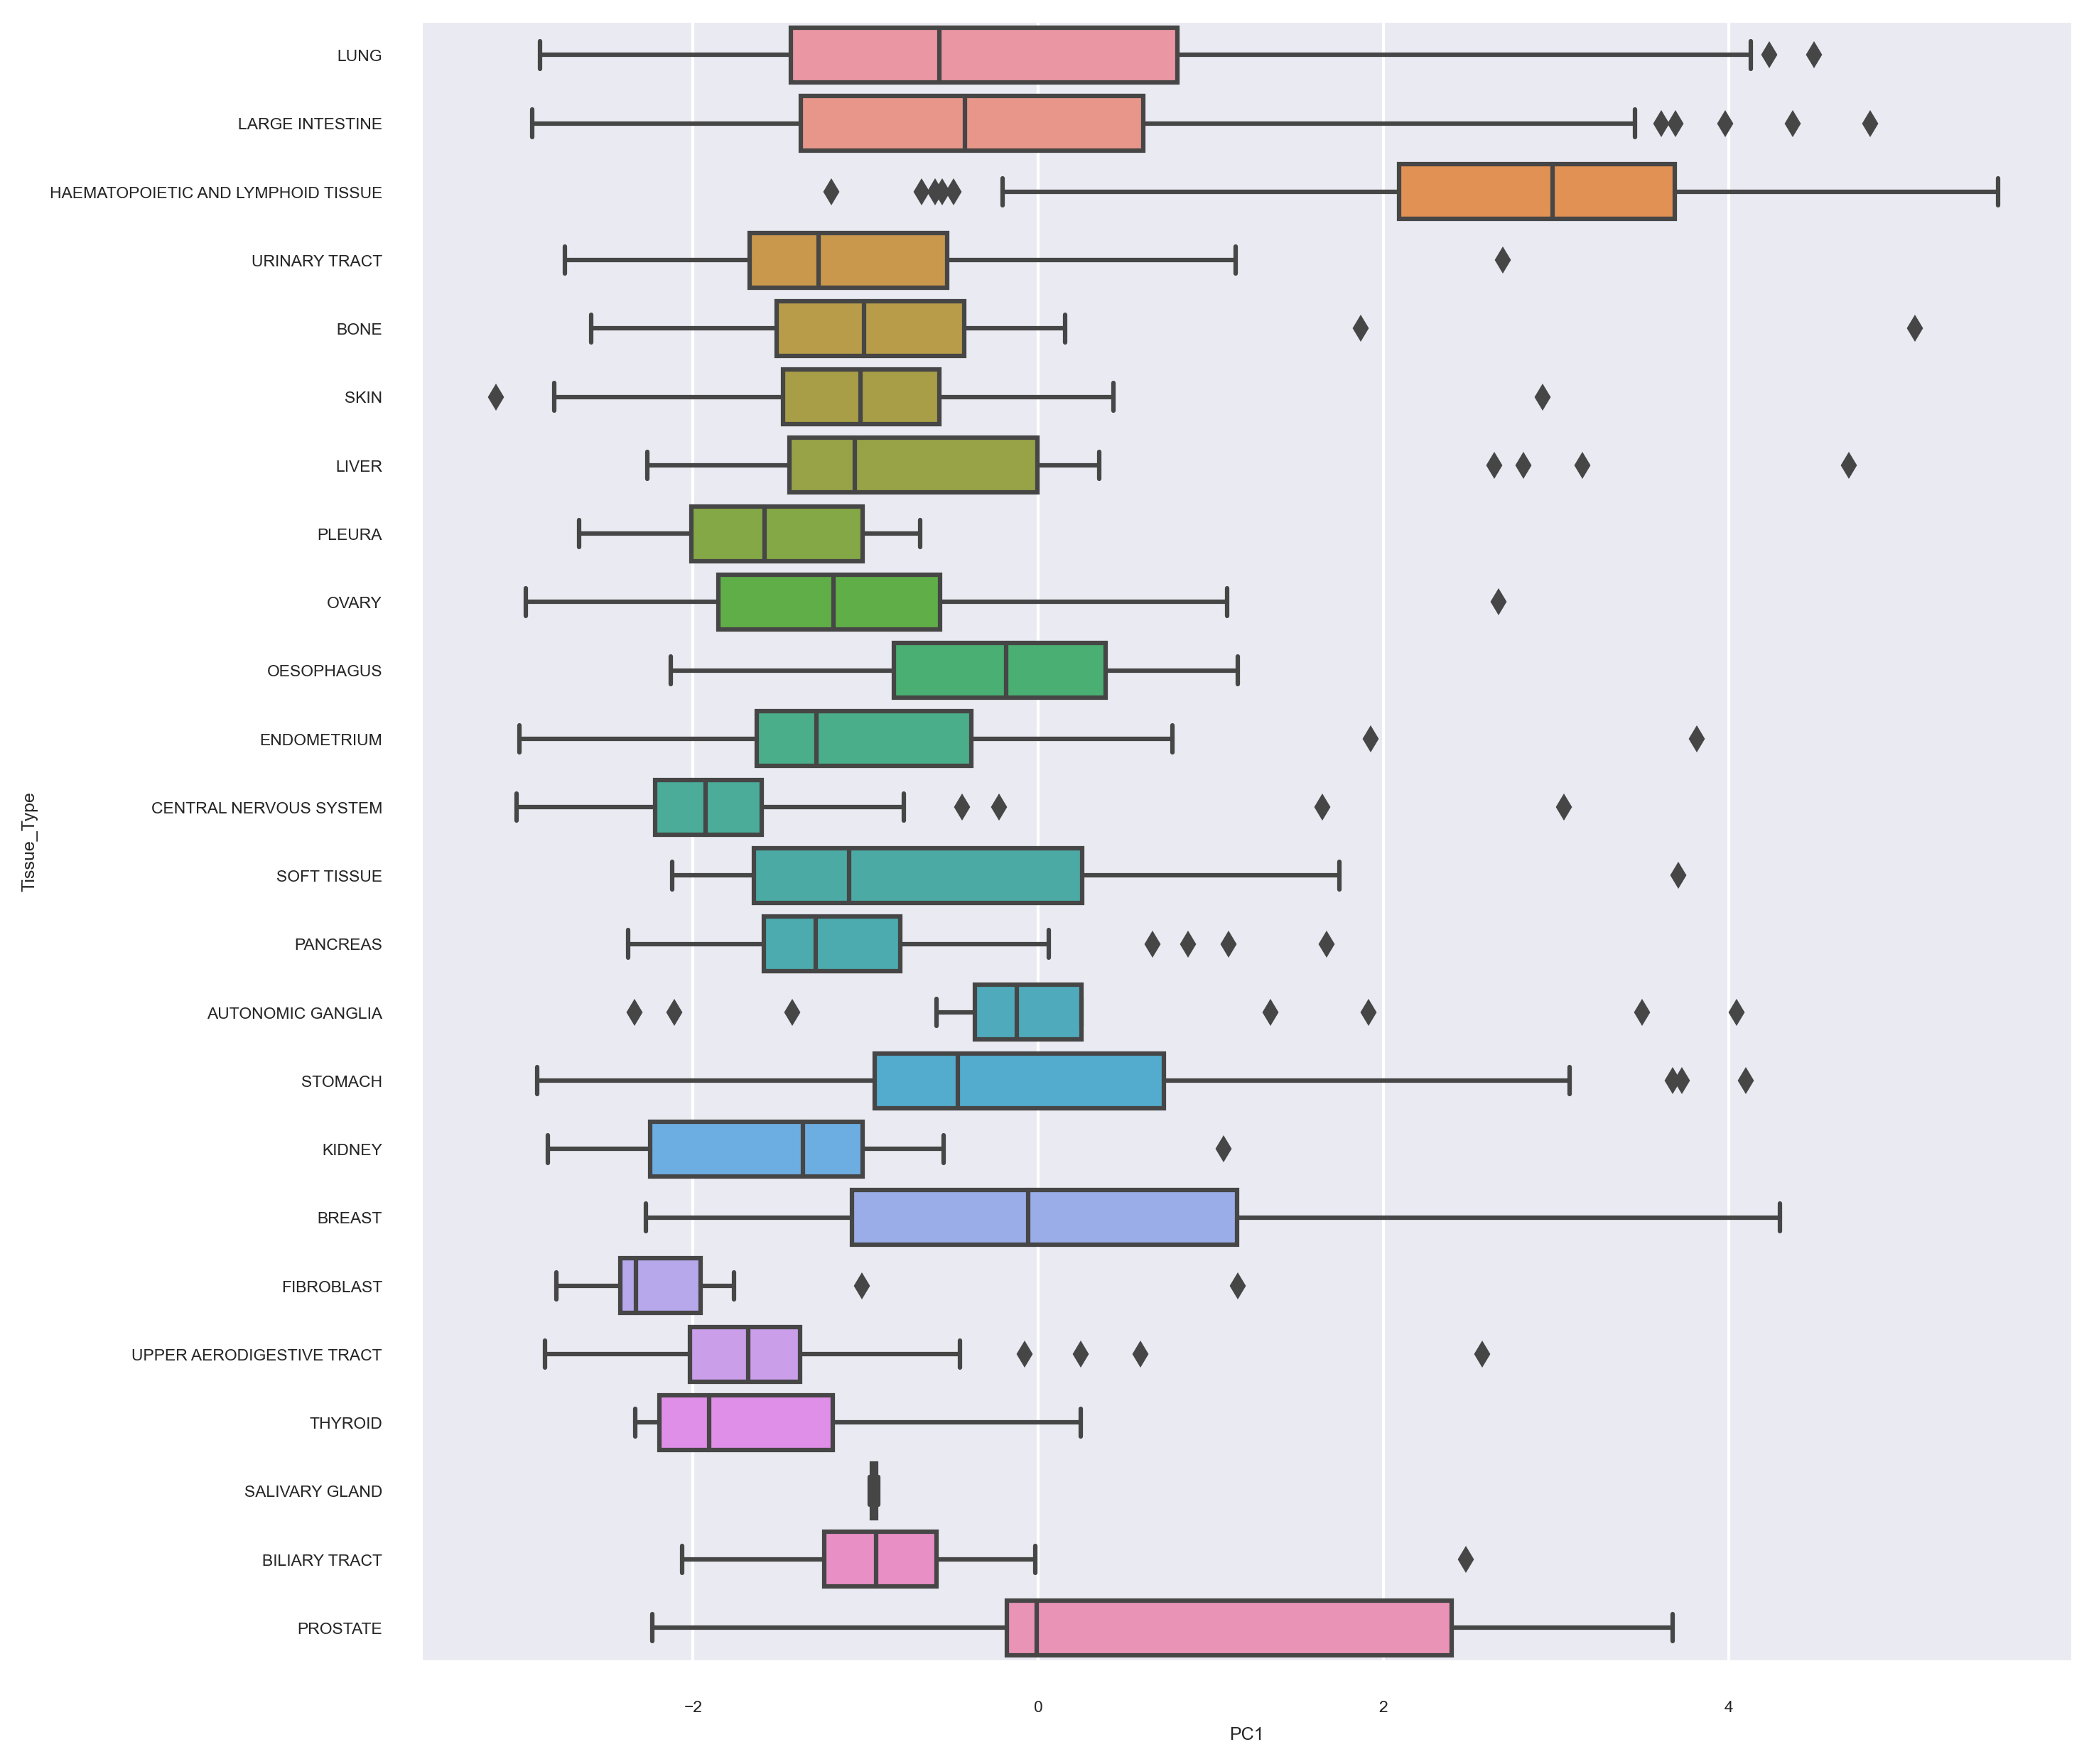

In [60]:
sns.boxplot(data=metabolism_data, x="PC1", y="Tissue_Type")

**Distribution of PC5 in relation to media conditions**

<AxesSubplot: xlabel='PC5', ylabel='Media'>

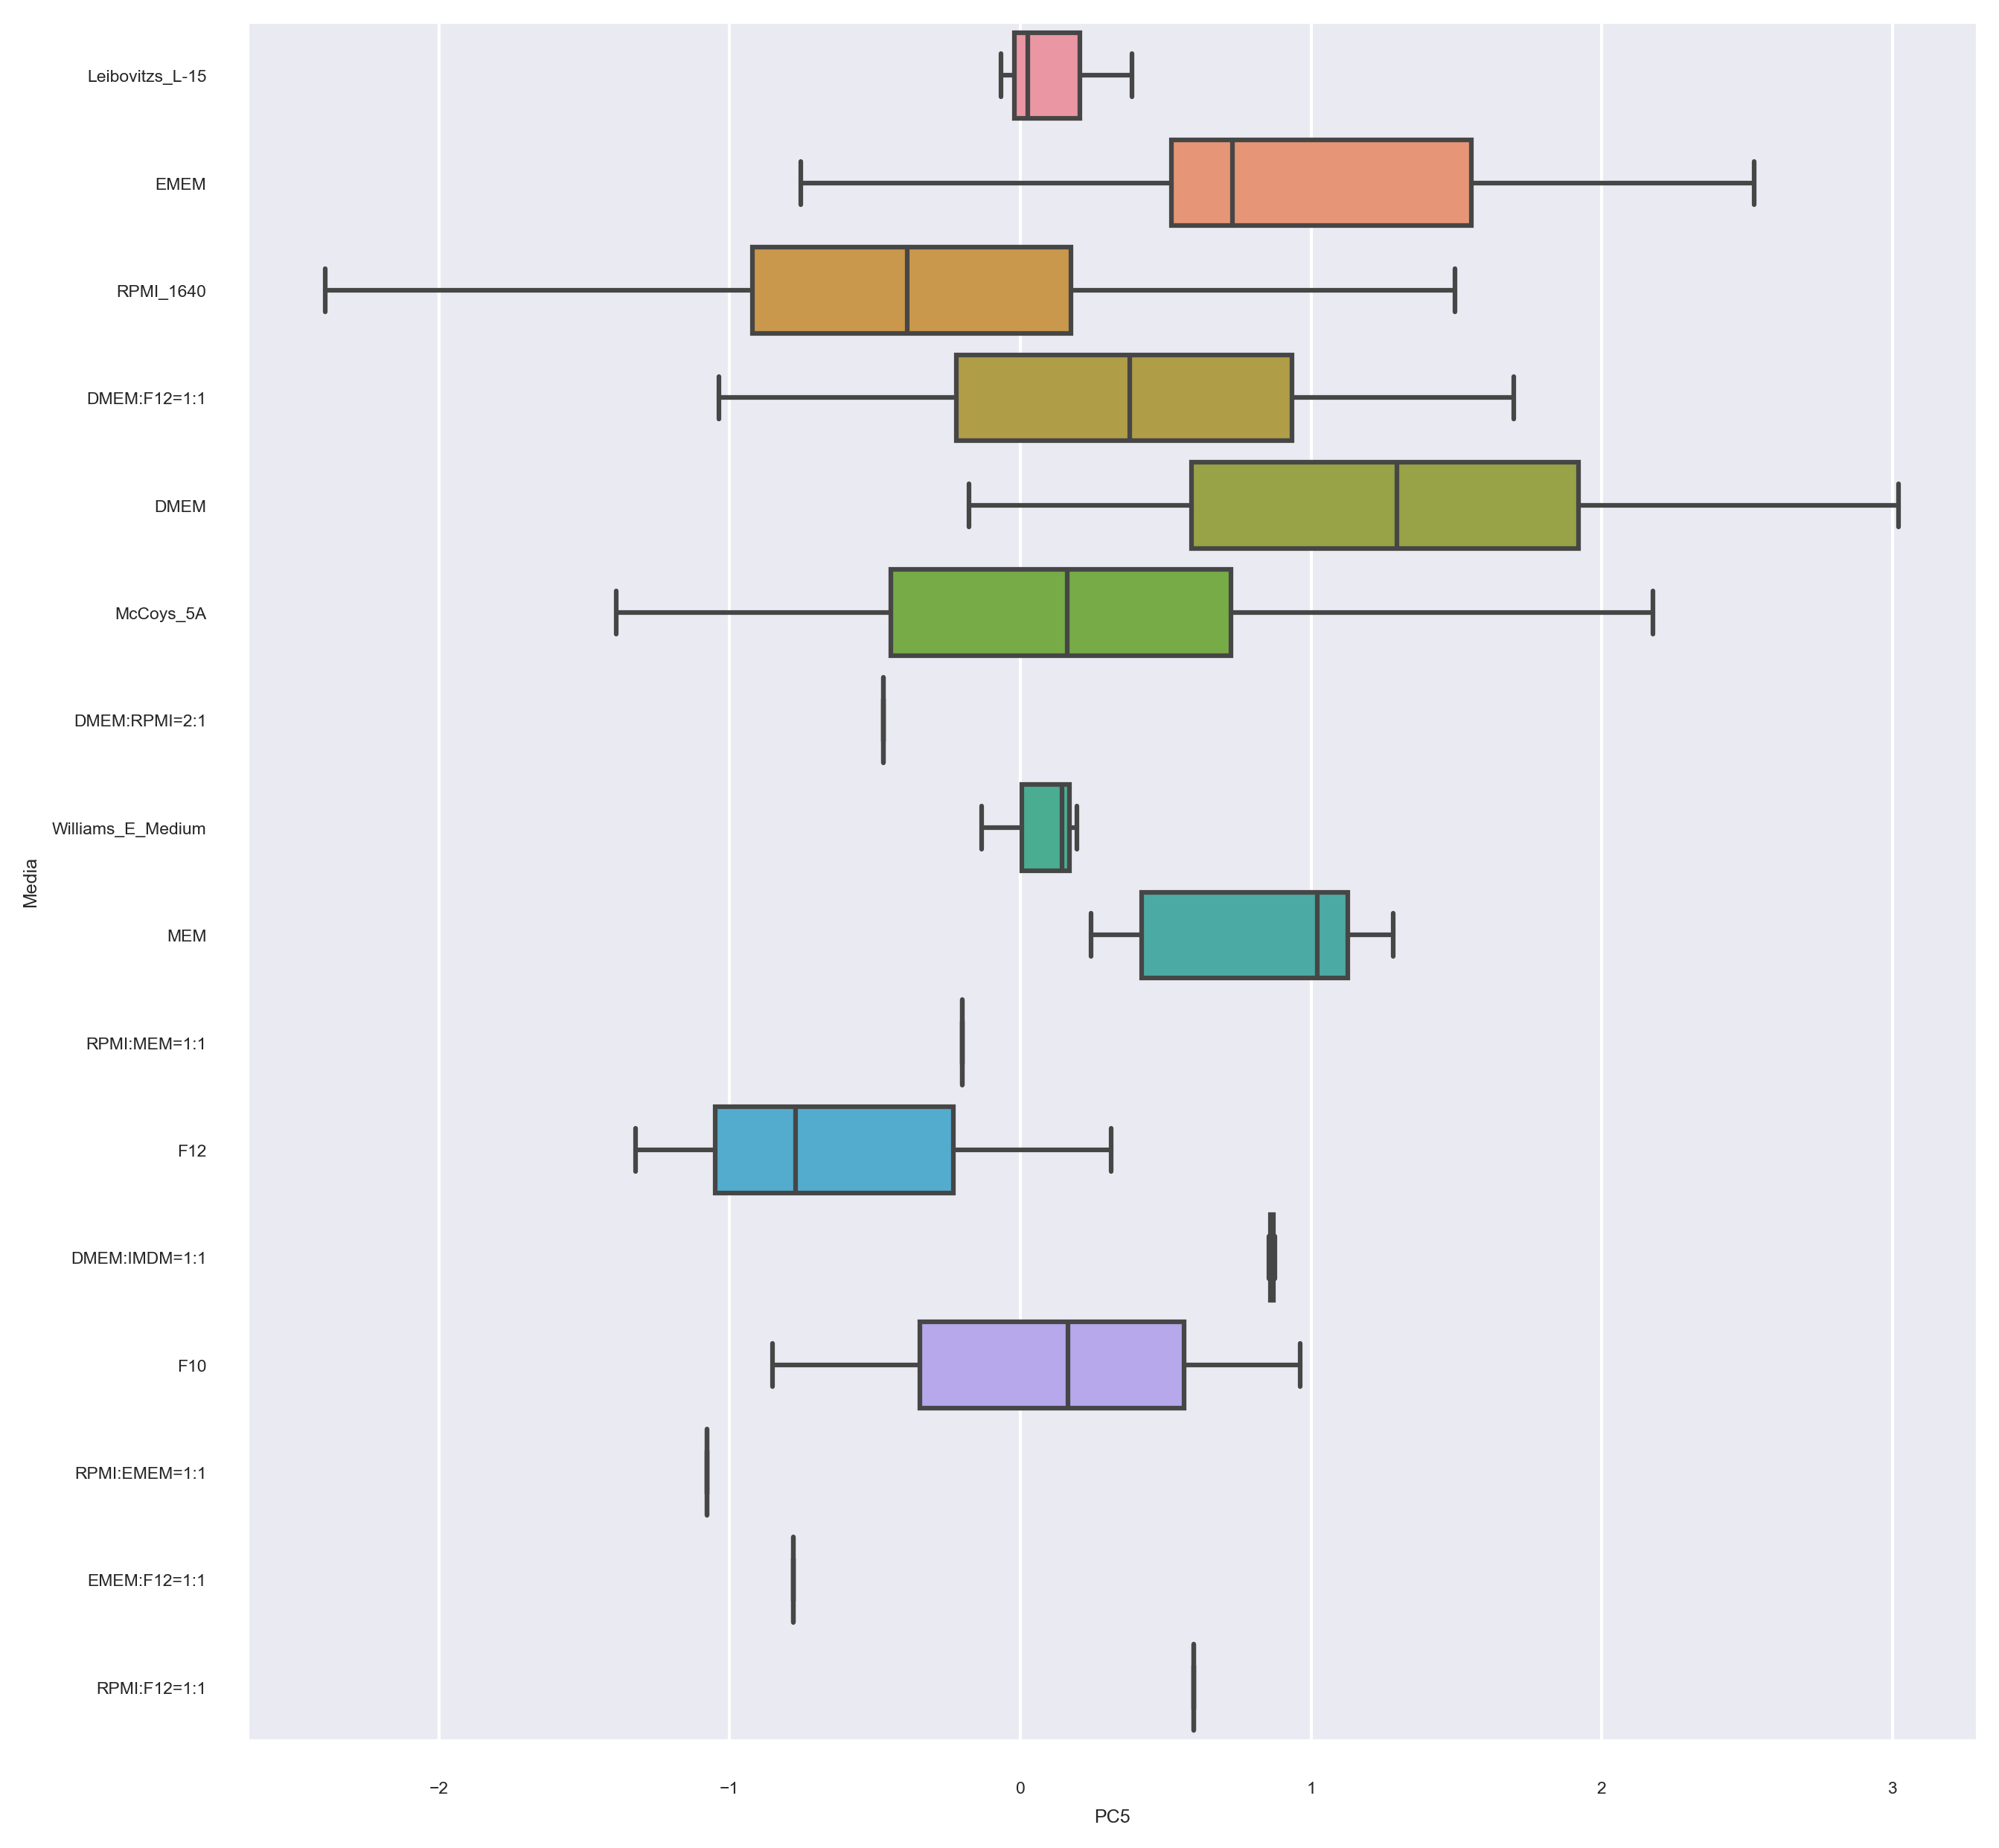

In [61]:
sns.boxplot(data=metabolism_data_sub, x="PC5", y="Media")

In [63]:
metabolism_data_sub

,3pg,4pyrdx,ade,akg,amp,cit,icit,cmp,cyst__L,cytd,...,sarcs,ala_B,ans,PC1,PC2,PC3,PC4,PC5,Tissue_Type,Media
SW1116_LARGE_INTESTINE,5.727045,6.073250,5.824473,5.768379,5.760784,5.914742,5.671970,5.658300,5.206822,5.908122,...,6.487142,5.653699,5.822247,-1.614953,-0.056263,1.241041,-0.664954,0.026161,LARGE INTESTINE,Leibovitzs_L-15
UMUC3_URINARY_TRACT,6.039330,5.645860,5.975171,5.180048,7.005265,5.435565,5.622860,6.532166,6.398870,6.722867,...,5.777817,5.666204,5.445817,2.693639,1.952148,-1.788497,-0.131531,0.628280,URINARY TRACT,EMEM
NCIH1184_LUNG,4.975255,6.732553,5.712883,5.429538,5.477195,5.907253,6.077787,5.667329,6.146284,6.871793,...,6.080873,5.330681,6.527109,-1.873849,1.655003,3.084250,-0.506791,-2.094276,LUNG,RPMI_1640
NCIH28_PLEURA,5.531891,5.884716,6.078888,5.836472,5.500700,5.593623,5.606817,5.112908,5.422130,6.478275,...,5.425592,5.810348,6.034771,-0.717317,1.241186,0.599243,0.381001,-0.572355,PLEURA,RPMI_1640
JHOS4_OVARY,5.502813,5.680282,5.746794,6.023158,6.012875,6.021163,5.786458,6.083153,6.512593,5.425659,...,5.792817,5.436865,5.928392,-1.227525,0.822228,0.235229,-0.097589,0.431783,OVARY,DMEM:F12=1:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647V_URINARY_TRACT,5.621149,6.121906,5.816952,5.453601,5.726039,5.995274,5.926295,5.414548,5.883976,4.811998,...,5.862832,5.606061,5.942591,-1.671420,0.894857,-0.596528,-0.440672,0.485550,URINARY TRACT,DMEM
JHUEM7_ENDOMETRIUM,5.768552,6.129951,5.370795,5.922686,6.101453,5.844896,5.697909,6.080185,5.574236,5.955988,...,5.890869,6.632449,5.505113,-1.419012,-0.083890,-1.268145,-0.591629,0.869463,ENDOMETRIUM,DMEM:F12=1:1
OE21_OESOPHAGUS,5.913960,5.701195,6.025035,5.758985,5.475312,5.896312,5.952444,5.543927,6.100072,5.344745,...,5.760641,5.693457,5.900250,-0.437838,-0.809975,2.244563,0.721337,-0.133510,OESOPHAGUS,RPMI_1640
NCIH2073_LUNG,5.904622,6.301520,6.680147,6.050884,5.724812,5.904078,5.845696,5.940311,5.525169,5.003539,...,5.963691,6.069321,5.781797,-1.201850,-0.746769,-0.912875,0.848942,-0.614525,LUNG,RPMI_1640


In [104]:
metabolism_data_sub

,3pg,4pyrdx,ade,akg,amp,cit,icit,cmp,cyst__L,cytd,...,sarcs,ala_B,ans,PC1,PC2,PC3,PC4,PC5,Tissue_Type,Media
SW1116_LARGE_INTESTINE,5.727045,6.073250,5.824473,5.768379,5.760784,5.914742,5.671970,5.658300,5.206822,5.908122,...,6.487142,5.653699,5.822247,-1.614953,-0.056263,1.241041,-0.664954,0.026161,LARGE INTESTINE,Leibovitzs_L-15
UMUC3_URINARY_TRACT,6.039330,5.645860,5.975171,5.180048,7.005265,5.435565,5.622860,6.532166,6.398870,6.722867,...,5.777817,5.666204,5.445817,2.693639,1.952148,-1.788497,-0.131531,0.628280,URINARY TRACT,EMEM
NCIH1184_LUNG,4.975255,6.732553,5.712883,5.429538,5.477195,5.907253,6.077787,5.667329,6.146284,6.871793,...,6.080873,5.330681,6.527109,-1.873849,1.655003,3.084250,-0.506791,-2.094276,LUNG,RPMI_1640
NCIH28_PLEURA,5.531891,5.884716,6.078888,5.836472,5.500700,5.593623,5.606817,5.112908,5.422130,6.478275,...,5.425592,5.810348,6.034771,-0.717317,1.241186,0.599243,0.381001,-0.572355,PLEURA,RPMI_1640
JHOS4_OVARY,5.502813,5.680282,5.746794,6.023158,6.012875,6.021163,5.786458,6.083153,6.512593,5.425659,...,5.792817,5.436865,5.928392,-1.227525,0.822228,0.235229,-0.097589,0.431783,OVARY,DMEM:F12=1:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647V_URINARY_TRACT,5.621149,6.121906,5.816952,5.453601,5.726039,5.995274,5.926295,5.414548,5.883976,4.811998,...,5.862832,5.606061,5.942591,-1.671420,0.894857,-0.596528,-0.440672,0.485550,URINARY TRACT,DMEM
JHUEM7_ENDOMETRIUM,5.768552,6.129951,5.370795,5.922686,6.101453,5.844896,5.697909,6.080185,5.574236,5.955988,...,5.890869,6.632449,5.505113,-1.419012,-0.083890,-1.268145,-0.591629,0.869463,ENDOMETRIUM,DMEM:F12=1:1
OE21_OESOPHAGUS,5.913960,5.701195,6.025035,5.758985,5.475312,5.896312,5.952444,5.543927,6.100072,5.344745,...,5.760641,5.693457,5.900250,-0.437838,-0.809975,2.244563,0.721337,-0.133510,OESOPHAGUS,RPMI_1640
NCIH2073_LUNG,5.904622,6.301520,6.680147,6.050884,5.724812,5.904078,5.845696,5.940311,5.525169,5.003539,...,5.963691,6.069321,5.781797,-1.201850,-0.746769,-0.912875,0.848942,-0.614525,LUNG,RPMI_1640


**Plot Media Conditions and covariance with PC4, PC5**

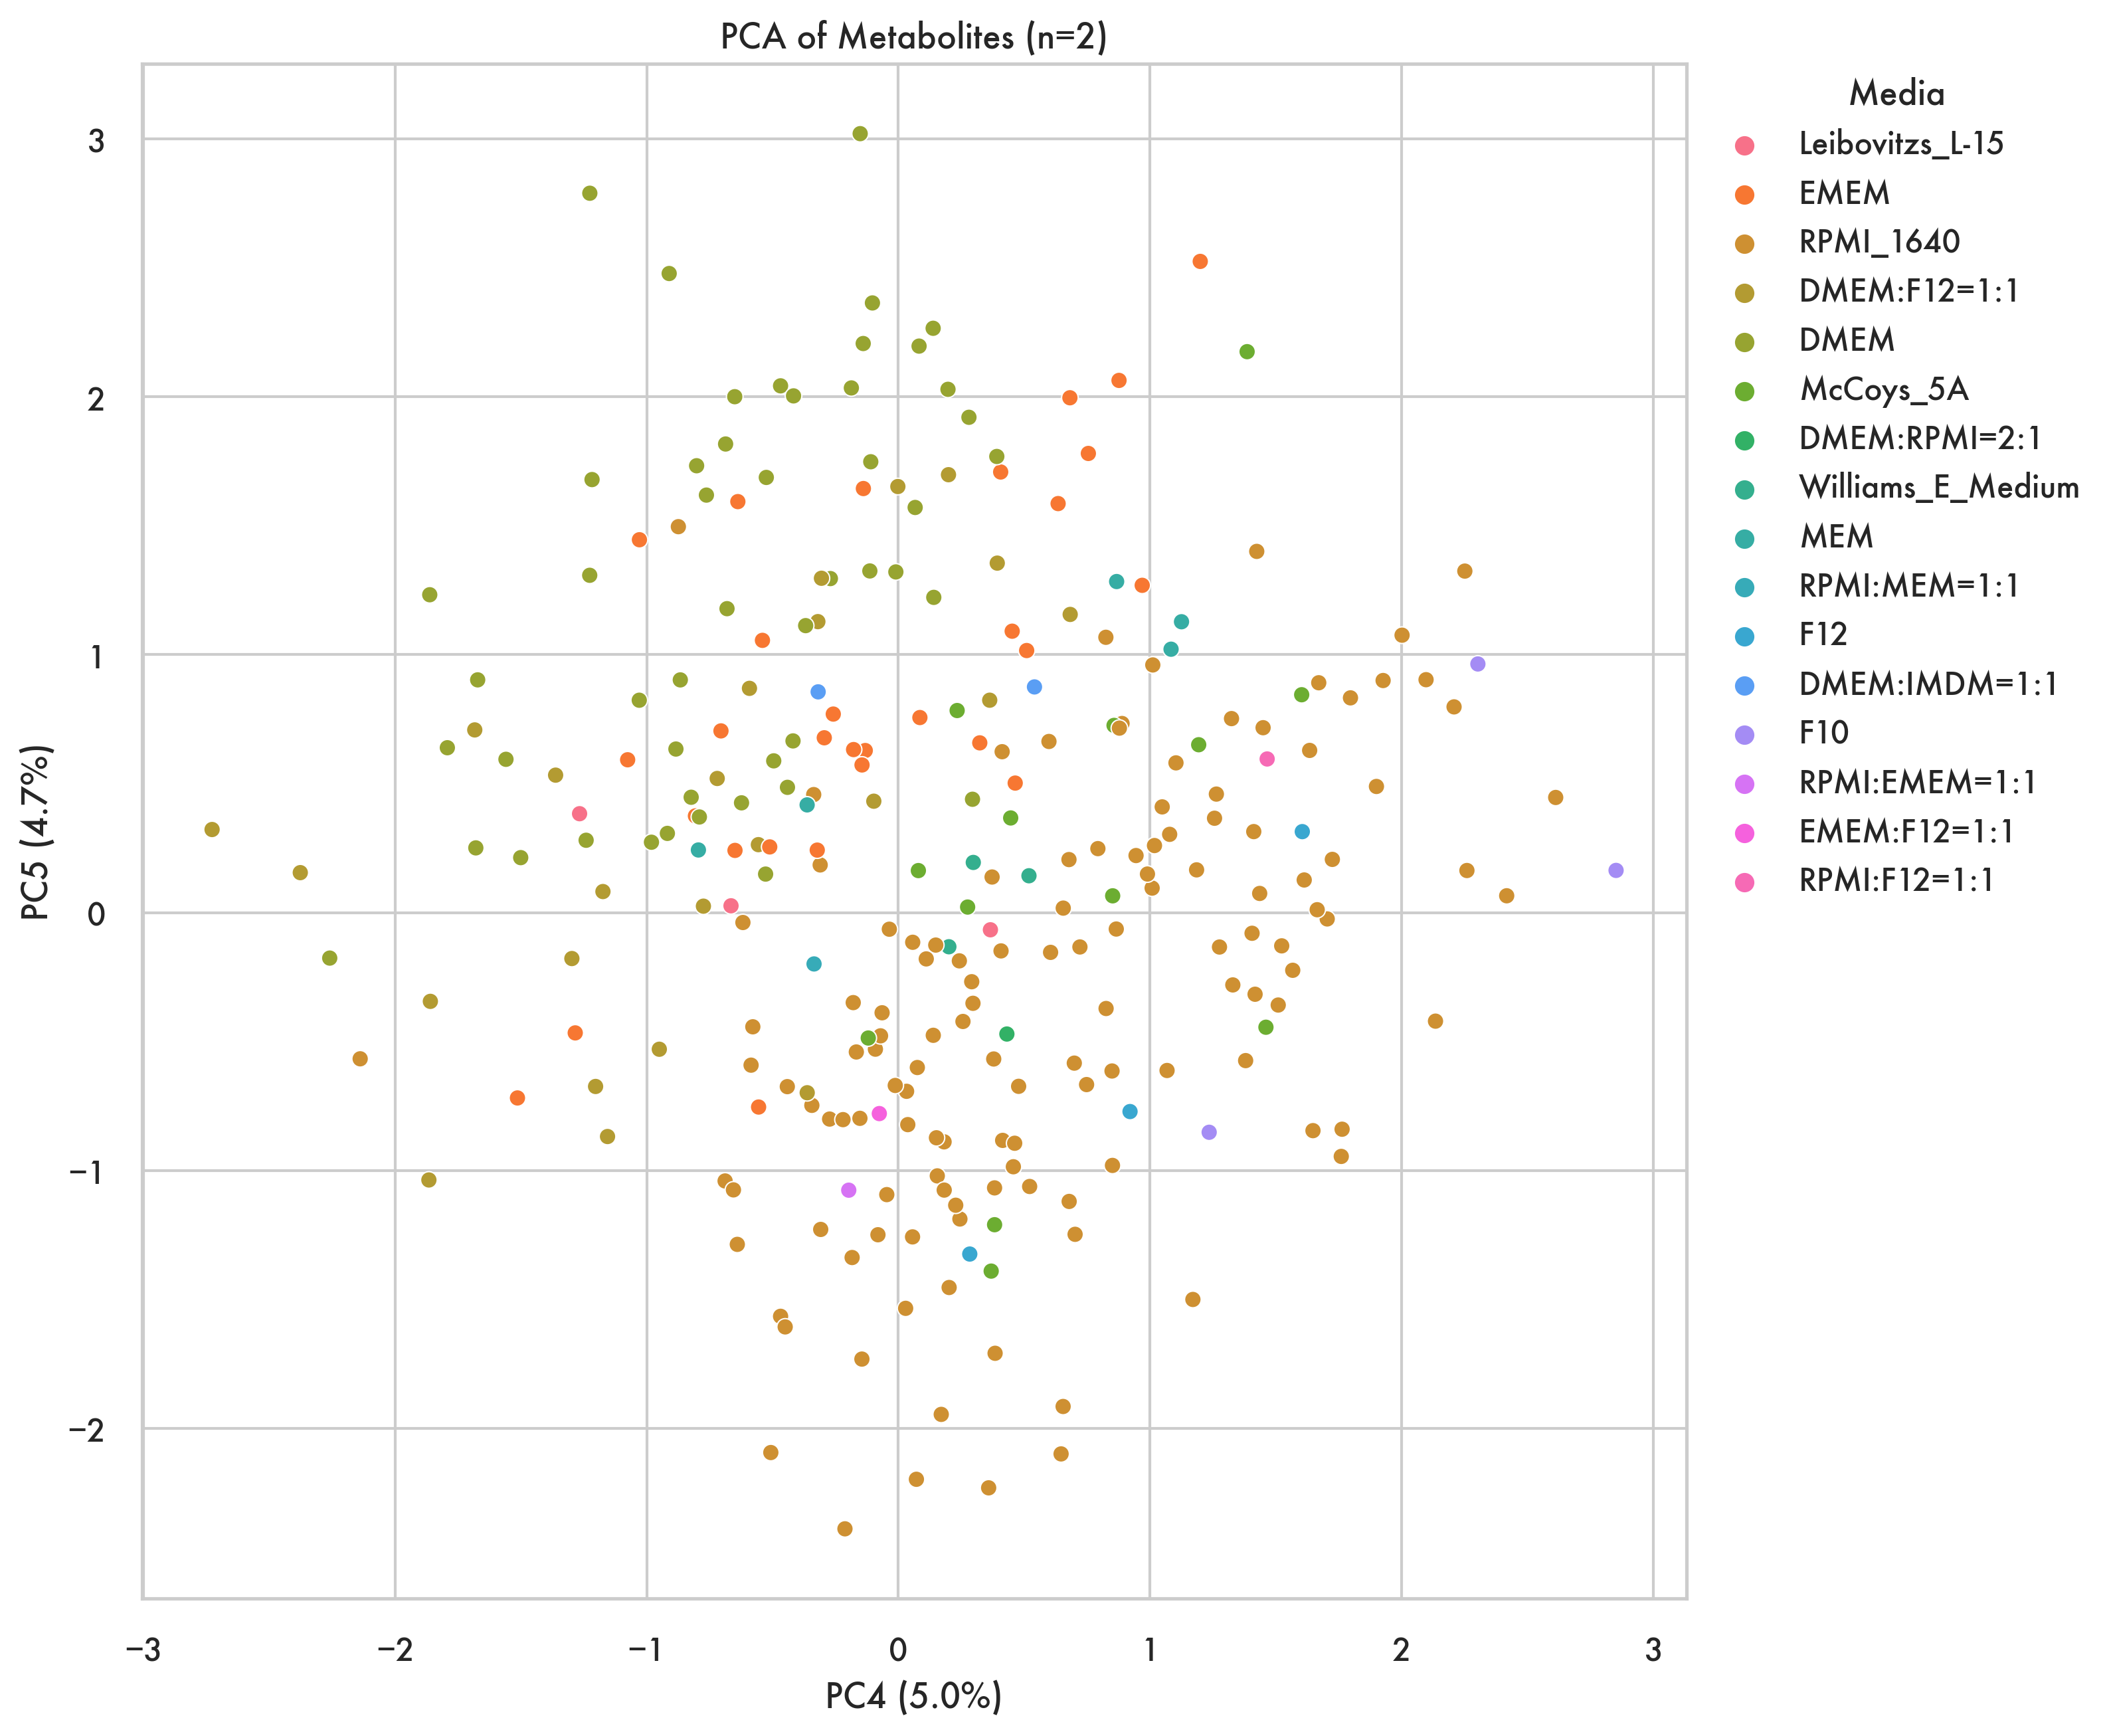

In [49]:
sns.set_theme(style = "whitegrid", rc={'figure.figsize':(10,10),"figure.dpi":300, 'savefig.dpi':300, "font.family":"Futura" })
fig,axpca = plt.subplots()
scatter = sns.scatterplot(x = "PC4", y = "PC5", data=metabolism_data_sub,hue = "Media",legend = "full", sizes= 1).set(title = "PCA of Metabolites (n=2)")
axpca.set(xlabel='PC4 ({}%)'.format(round(explained_variance[3]*100, 1)), ylabel='PC5 ({}%)'.format(round(explained_variance[4]*100, 1)))
sns.move_legend(axpca,"upper left", bbox_to_anchor=(1, 1.01))


**Estimate the best k for KMeans clustering**

/Users/tcong/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


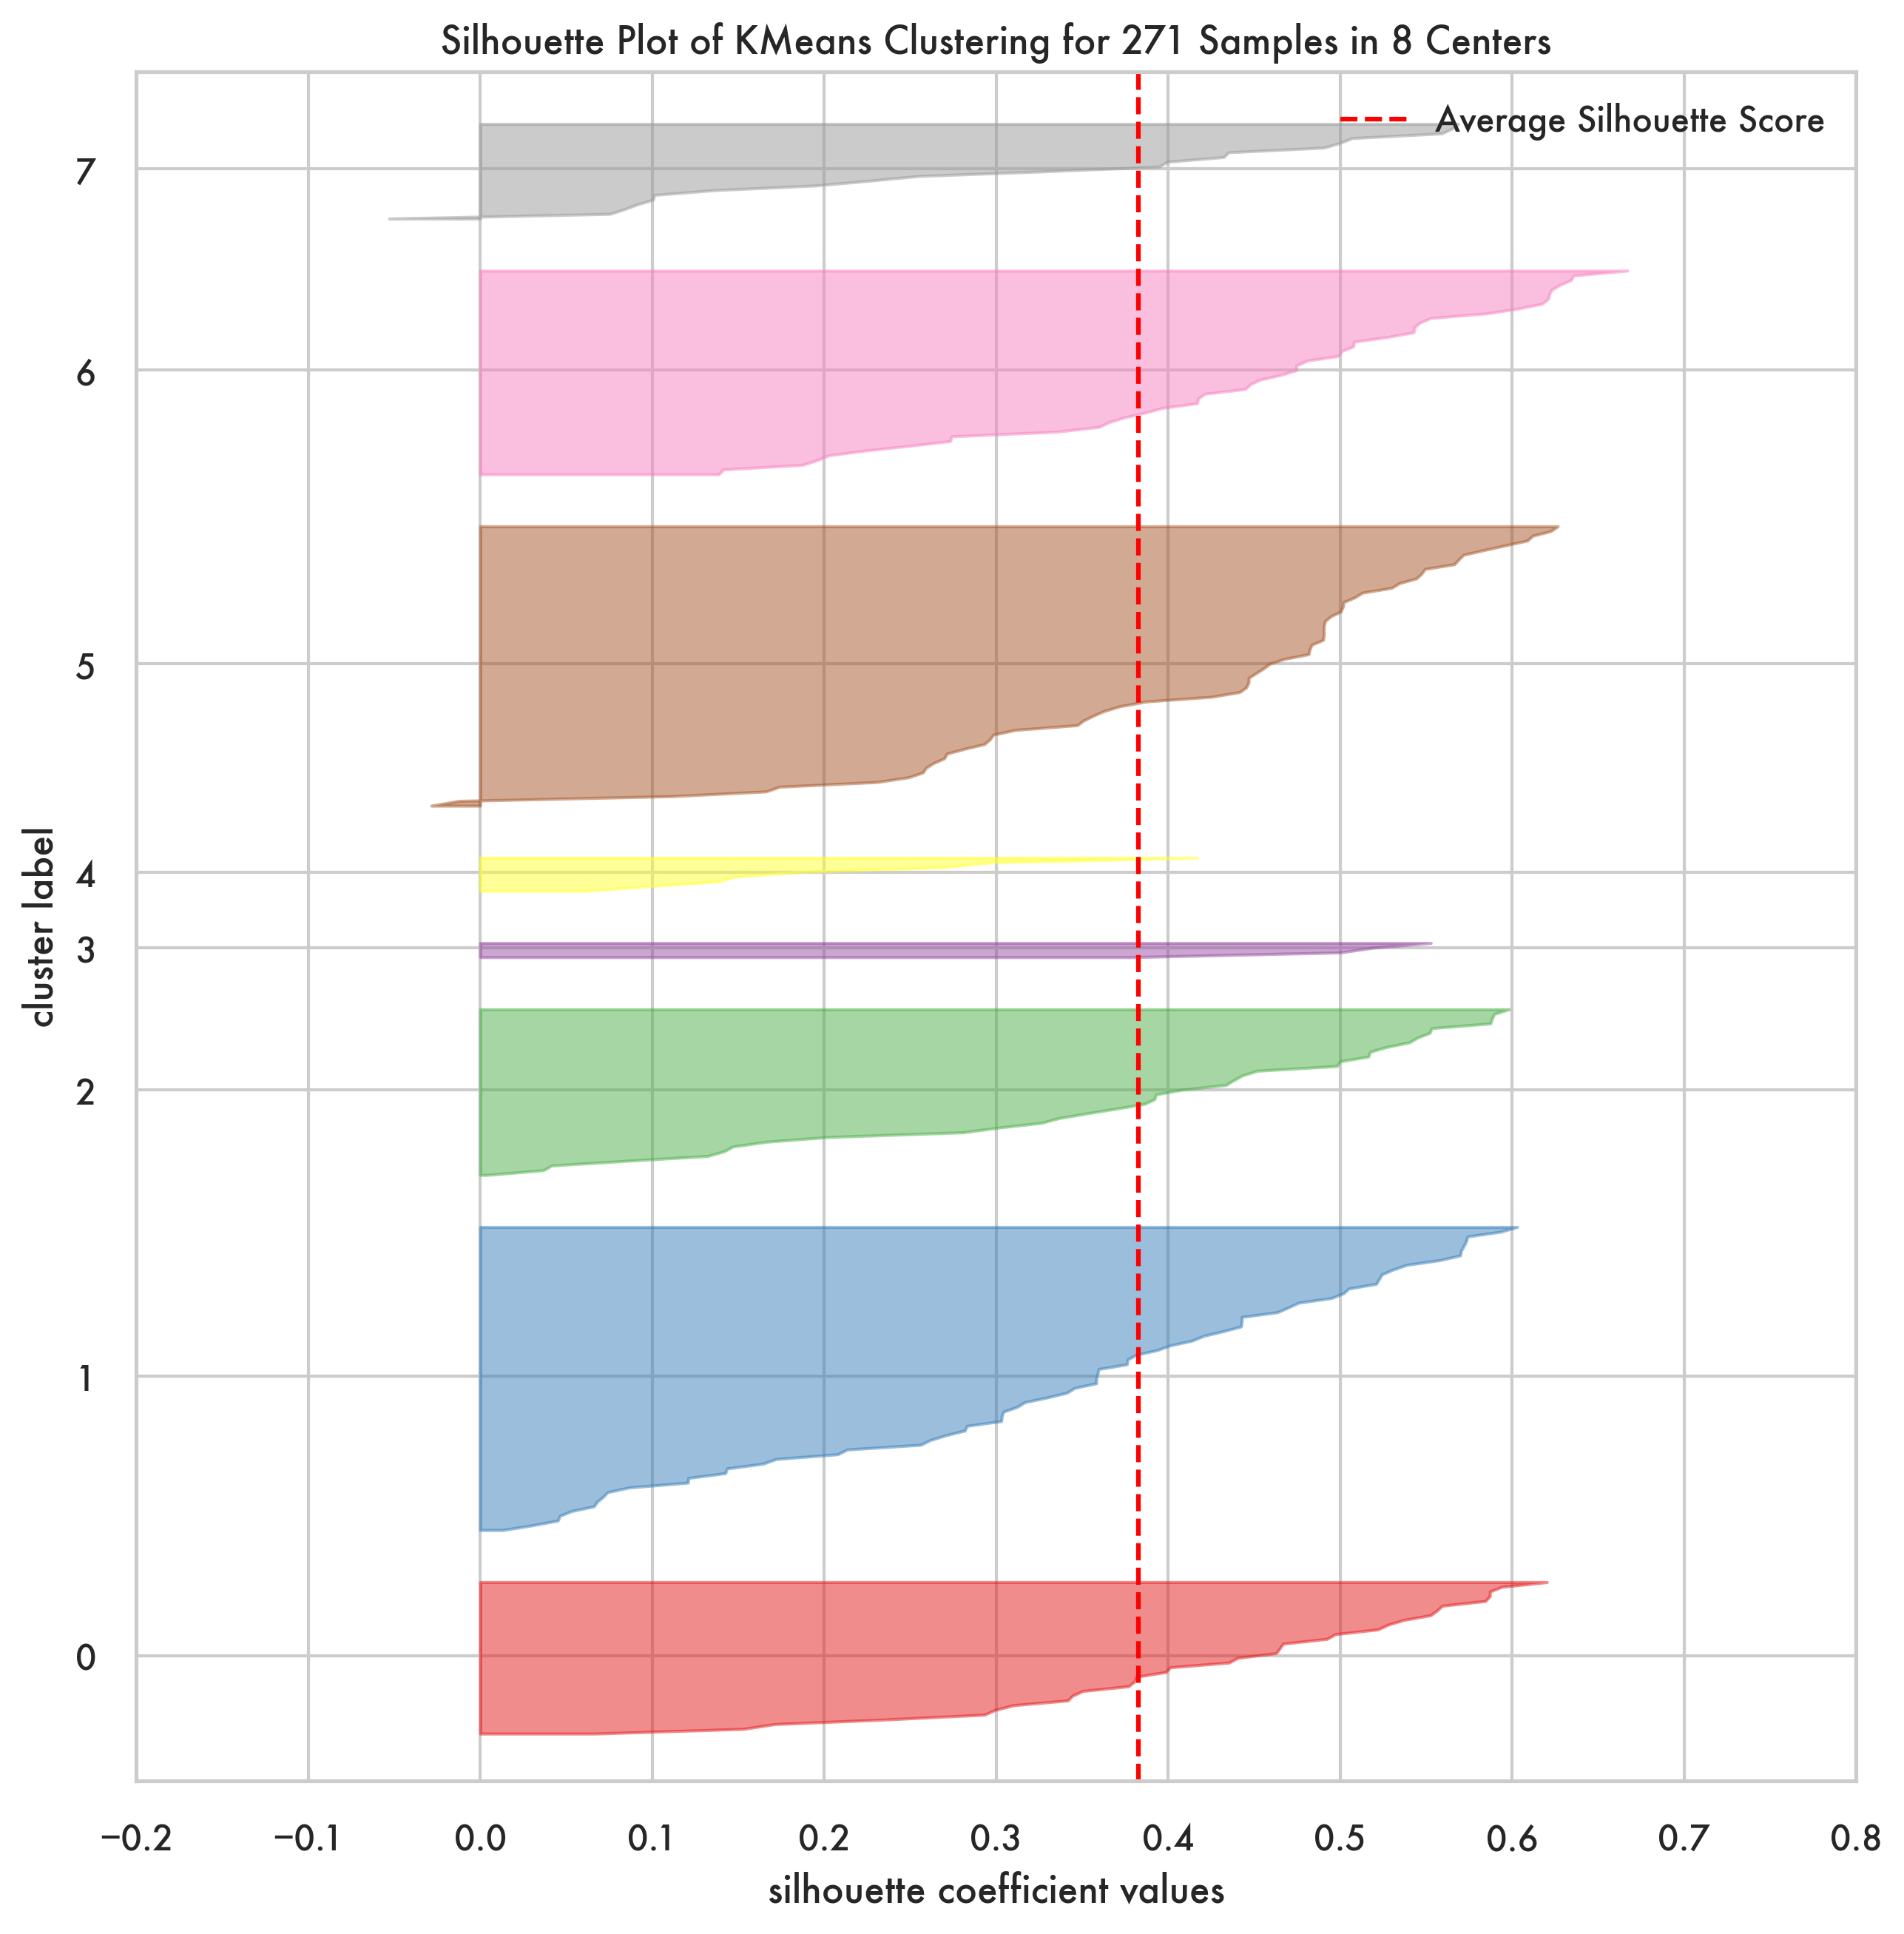

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 271 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
metabolism_data_sub = metabolism_data_sub[["PC1", "PC2"]]
metabolism_data_silhouette = metabolism_data_sub.iloc[:,:107]
model = KMeans()
visualizer = SilhouetteVisualizer(model, k=(2,30), timings= True)
visualizer.fit(metabolism_data_silhouette)
visualizer.show()

**Calculate Clusters on Metabolism Data**

In [37]:
clusters = visualizer.n_clusters_
kmeans = KMeans(n_clusters= clusters)
kmeans.fit(metabolism_data_silhouette)
y_kmeans = kmeans.predict(metabolism_data_silhouette)

/Users/tcong/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Plot cluster overlay with PC1, PC2**

/var/folders/jh/5fjcdzvn7csgsswjnkqx0c_00000gp/T/ipykernel_81365/1631888983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metabolism_data_sub["Cluster"] = kmeans.labels_


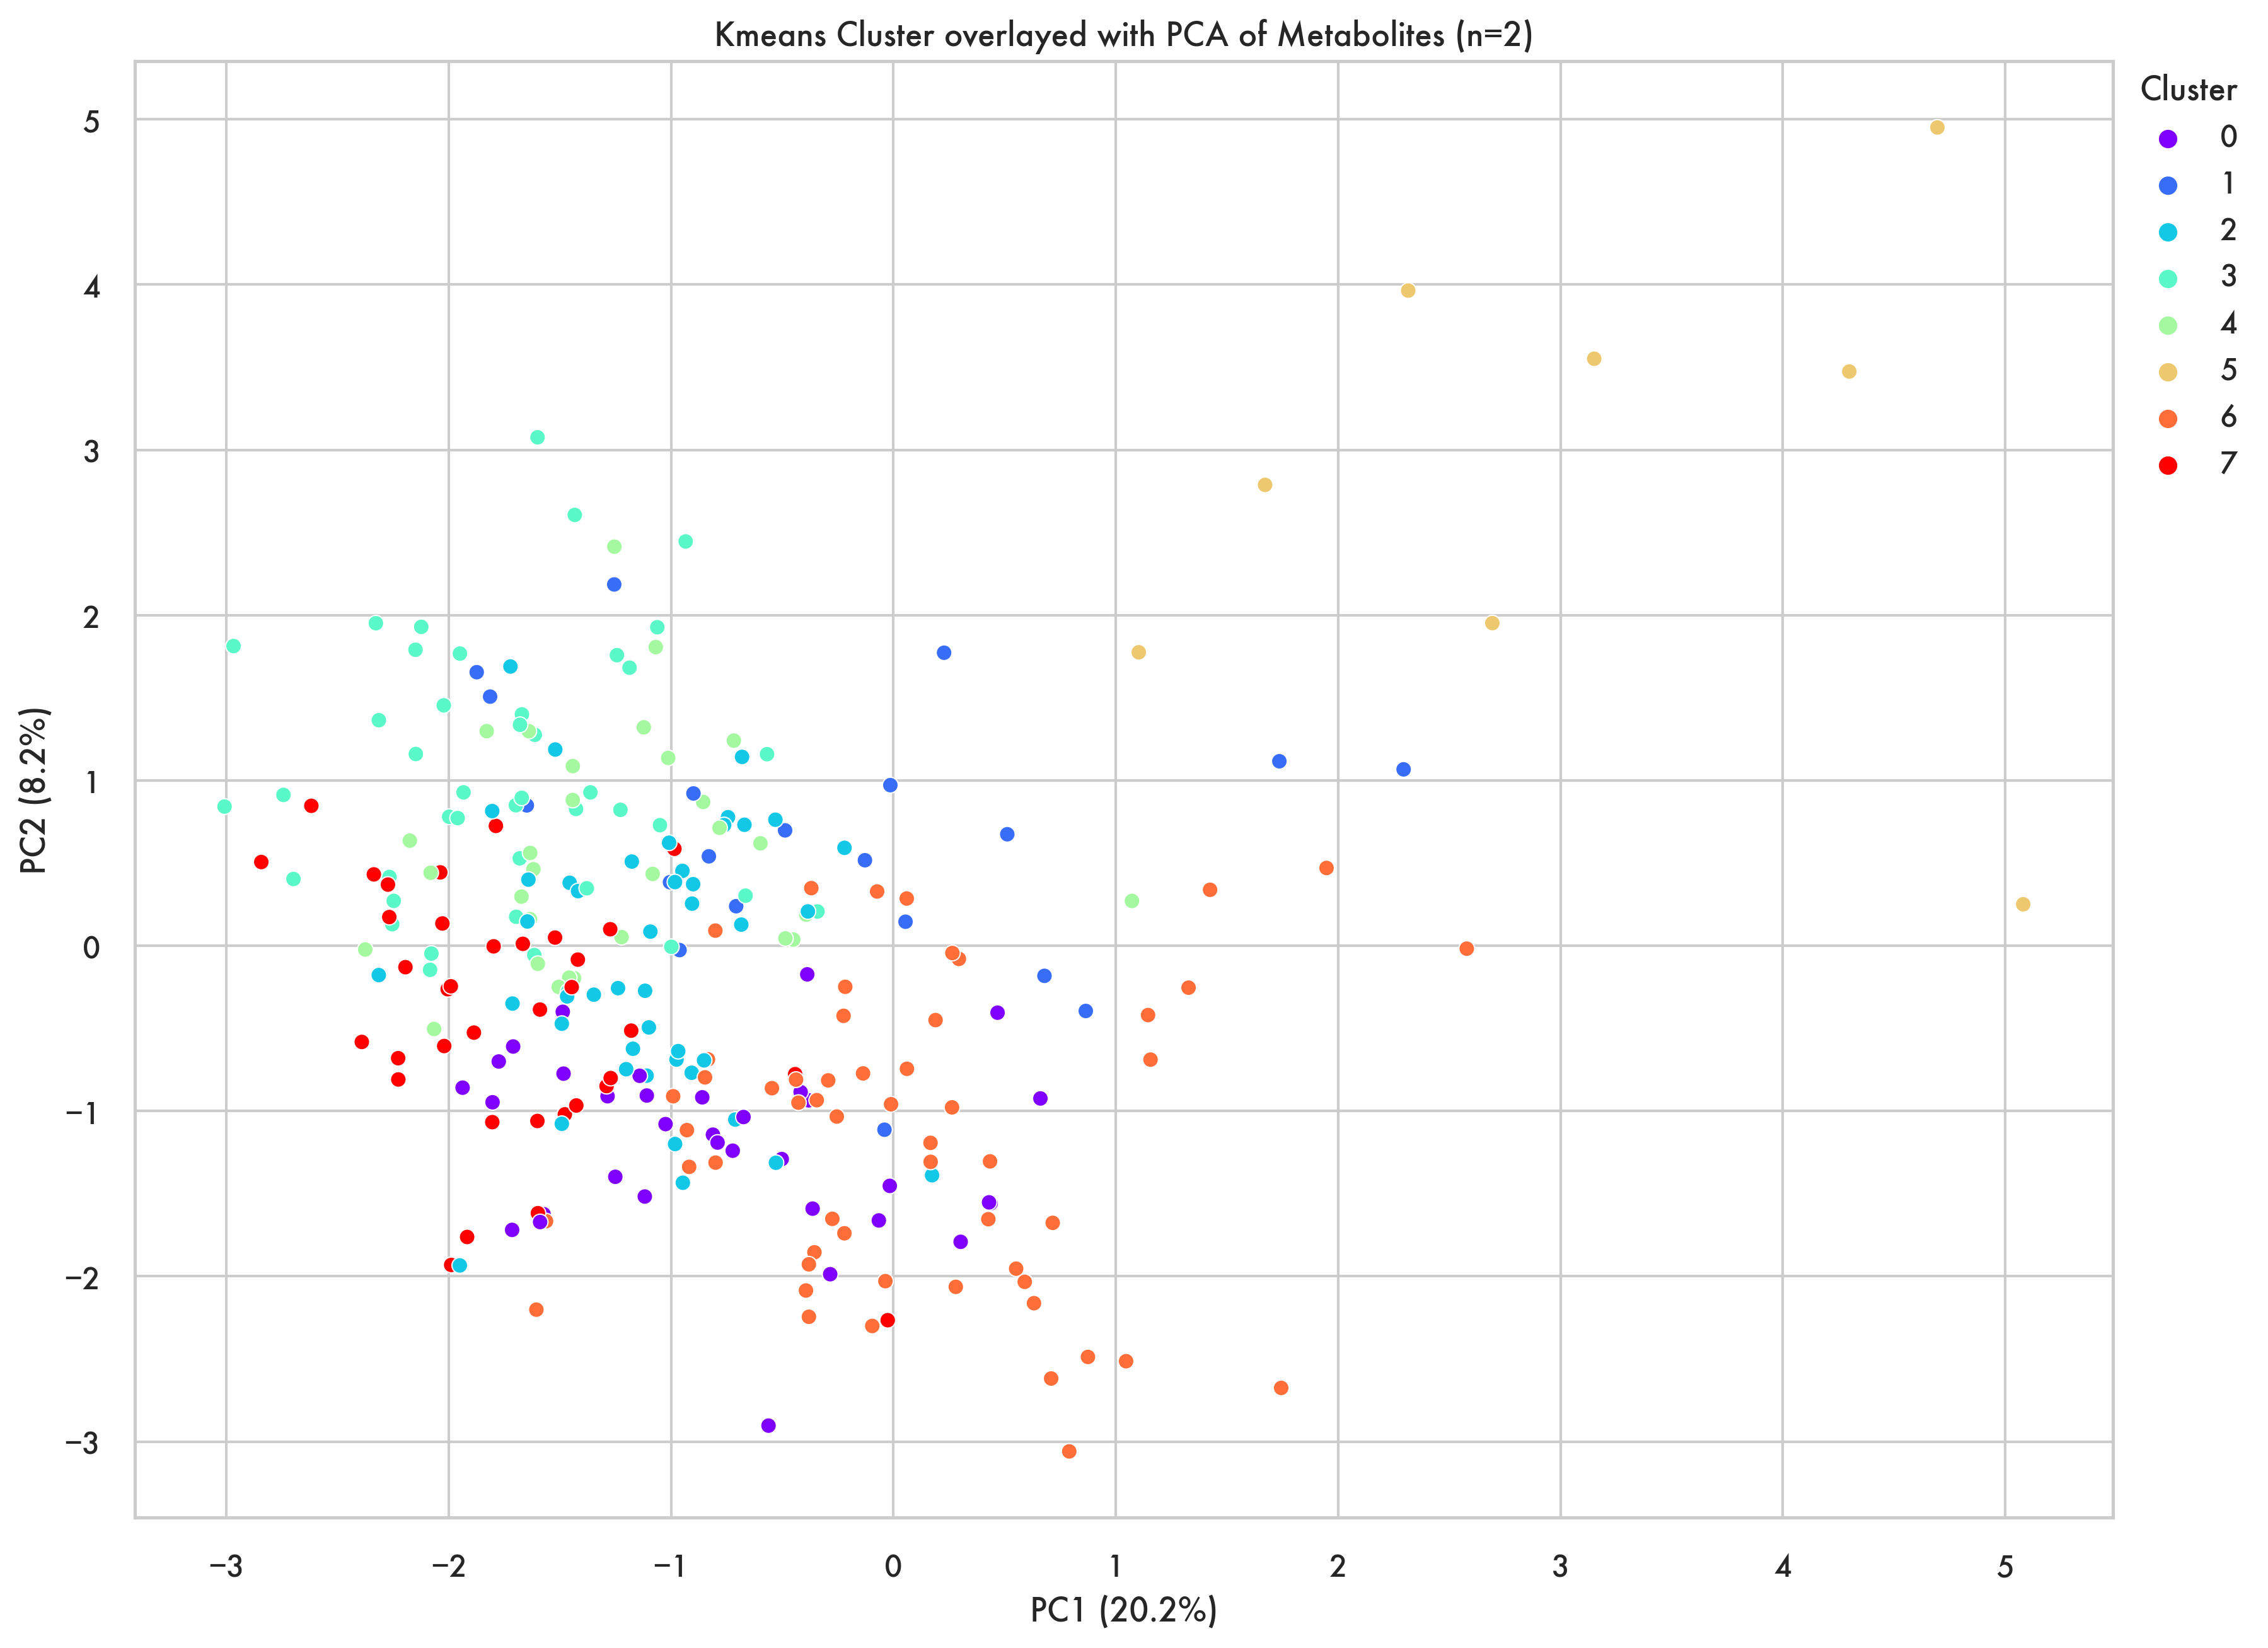

In [51]:
sns.set_theme(style = "whitegrid", rc={'figure.figsize':(13.5,10),"figure.dpi":300, 'savefig.dpi':300, "font.family":"Futura"})
metabolism_data_sub["Cluster"] = kmeans.labels_
fig,ax = plt.subplots()
scatter = sns.scatterplot(x = "PC1", y = "PC2", data=metabolism_data_sub, sizes= 12, hue = "Cluster",legend = "full", palette = "rainbow").set(title = "Kmeans Cluster overlayed with PCA of Metabolites (n=2)")
ax.set(xlabel='PC1 ({}%)'.format(round(explained_variance[0]*100, 1)), ylabel='PC2 ({}%)'.format(round(explained_variance[1]*100, 1)))
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1.01))

**Generate counts per cancer type in each cluster**

In [40]:
cluster_dist = pd.DataFrame(index = list(set(metabolism_data_sub["Tissue_Type"])), columns = list(set(metabolism_data_sub["Cluster"])),dtype=np.float64 )
gby = metabolism_data_sub.groupby(["Cluster", "Tissue_Type"]).count().PC2
for x in cluster_dist.columns:
    for y in cluster_dist.index:
        print(y,x)
        try:
            cluster_dist.loc[y,x] = gby.loc[x].loc[y]
        except KeyError:
            cluster_dist.loc[y,x] = 0

OESOPHAGUS 0
SOFT TISSUE 0
STOMACH 0
THYROID 0
LIVER 0
UPPER AERODIGESTIVE TRACT 0
BREAST 0
AUTONOMIC GANGLIA 0
KIDNEY 0
SKIN 0
LARGE INTESTINE 0
PLEURA 0
PROSTATE 0
CENTRAL NERVOUS SYSTEM 0
OVARY 0
URINARY TRACT 0
BILIARY TRACT 0
ENDOMETRIUM 0
LUNG 0
BONE 0
PANCREAS 0
OESOPHAGUS 1
SOFT TISSUE 1
STOMACH 1
THYROID 1
LIVER 1
UPPER AERODIGESTIVE TRACT 1
BREAST 1
AUTONOMIC GANGLIA 1
KIDNEY 1
SKIN 1
LARGE INTESTINE 1
PLEURA 1
PROSTATE 1
CENTRAL NERVOUS SYSTEM 1
OVARY 1
URINARY TRACT 1
BILIARY TRACT 1
ENDOMETRIUM 1
LUNG 1
BONE 1
PANCREAS 1
OESOPHAGUS 2
SOFT TISSUE 2
STOMACH 2
THYROID 2
LIVER 2
UPPER AERODIGESTIVE TRACT 2
BREAST 2
AUTONOMIC GANGLIA 2
KIDNEY 2
SKIN 2
LARGE INTESTINE 2
PLEURA 2
PROSTATE 2
CENTRAL NERVOUS SYSTEM 2
OVARY 2
URINARY TRACT 2
BILIARY TRACT 2
ENDOMETRIUM 2
LUNG 2
BONE 2
PANCREAS 2
OESOPHAGUS 3
SOFT TISSUE 3
STOMACH 3
THYROID 3
LIVER 3
UPPER AERODIGESTIVE TRACT 3
BREAST 3
AUTONOMIC GANGLIA 3
KIDNEY 3
SKIN 3
LARGE INTESTINE 3
PLEURA 3
PROSTATE 3
CENTRAL NERVOUS SYSTEM 3

**Plot cancer type vs. cluster distribution in heatmap**

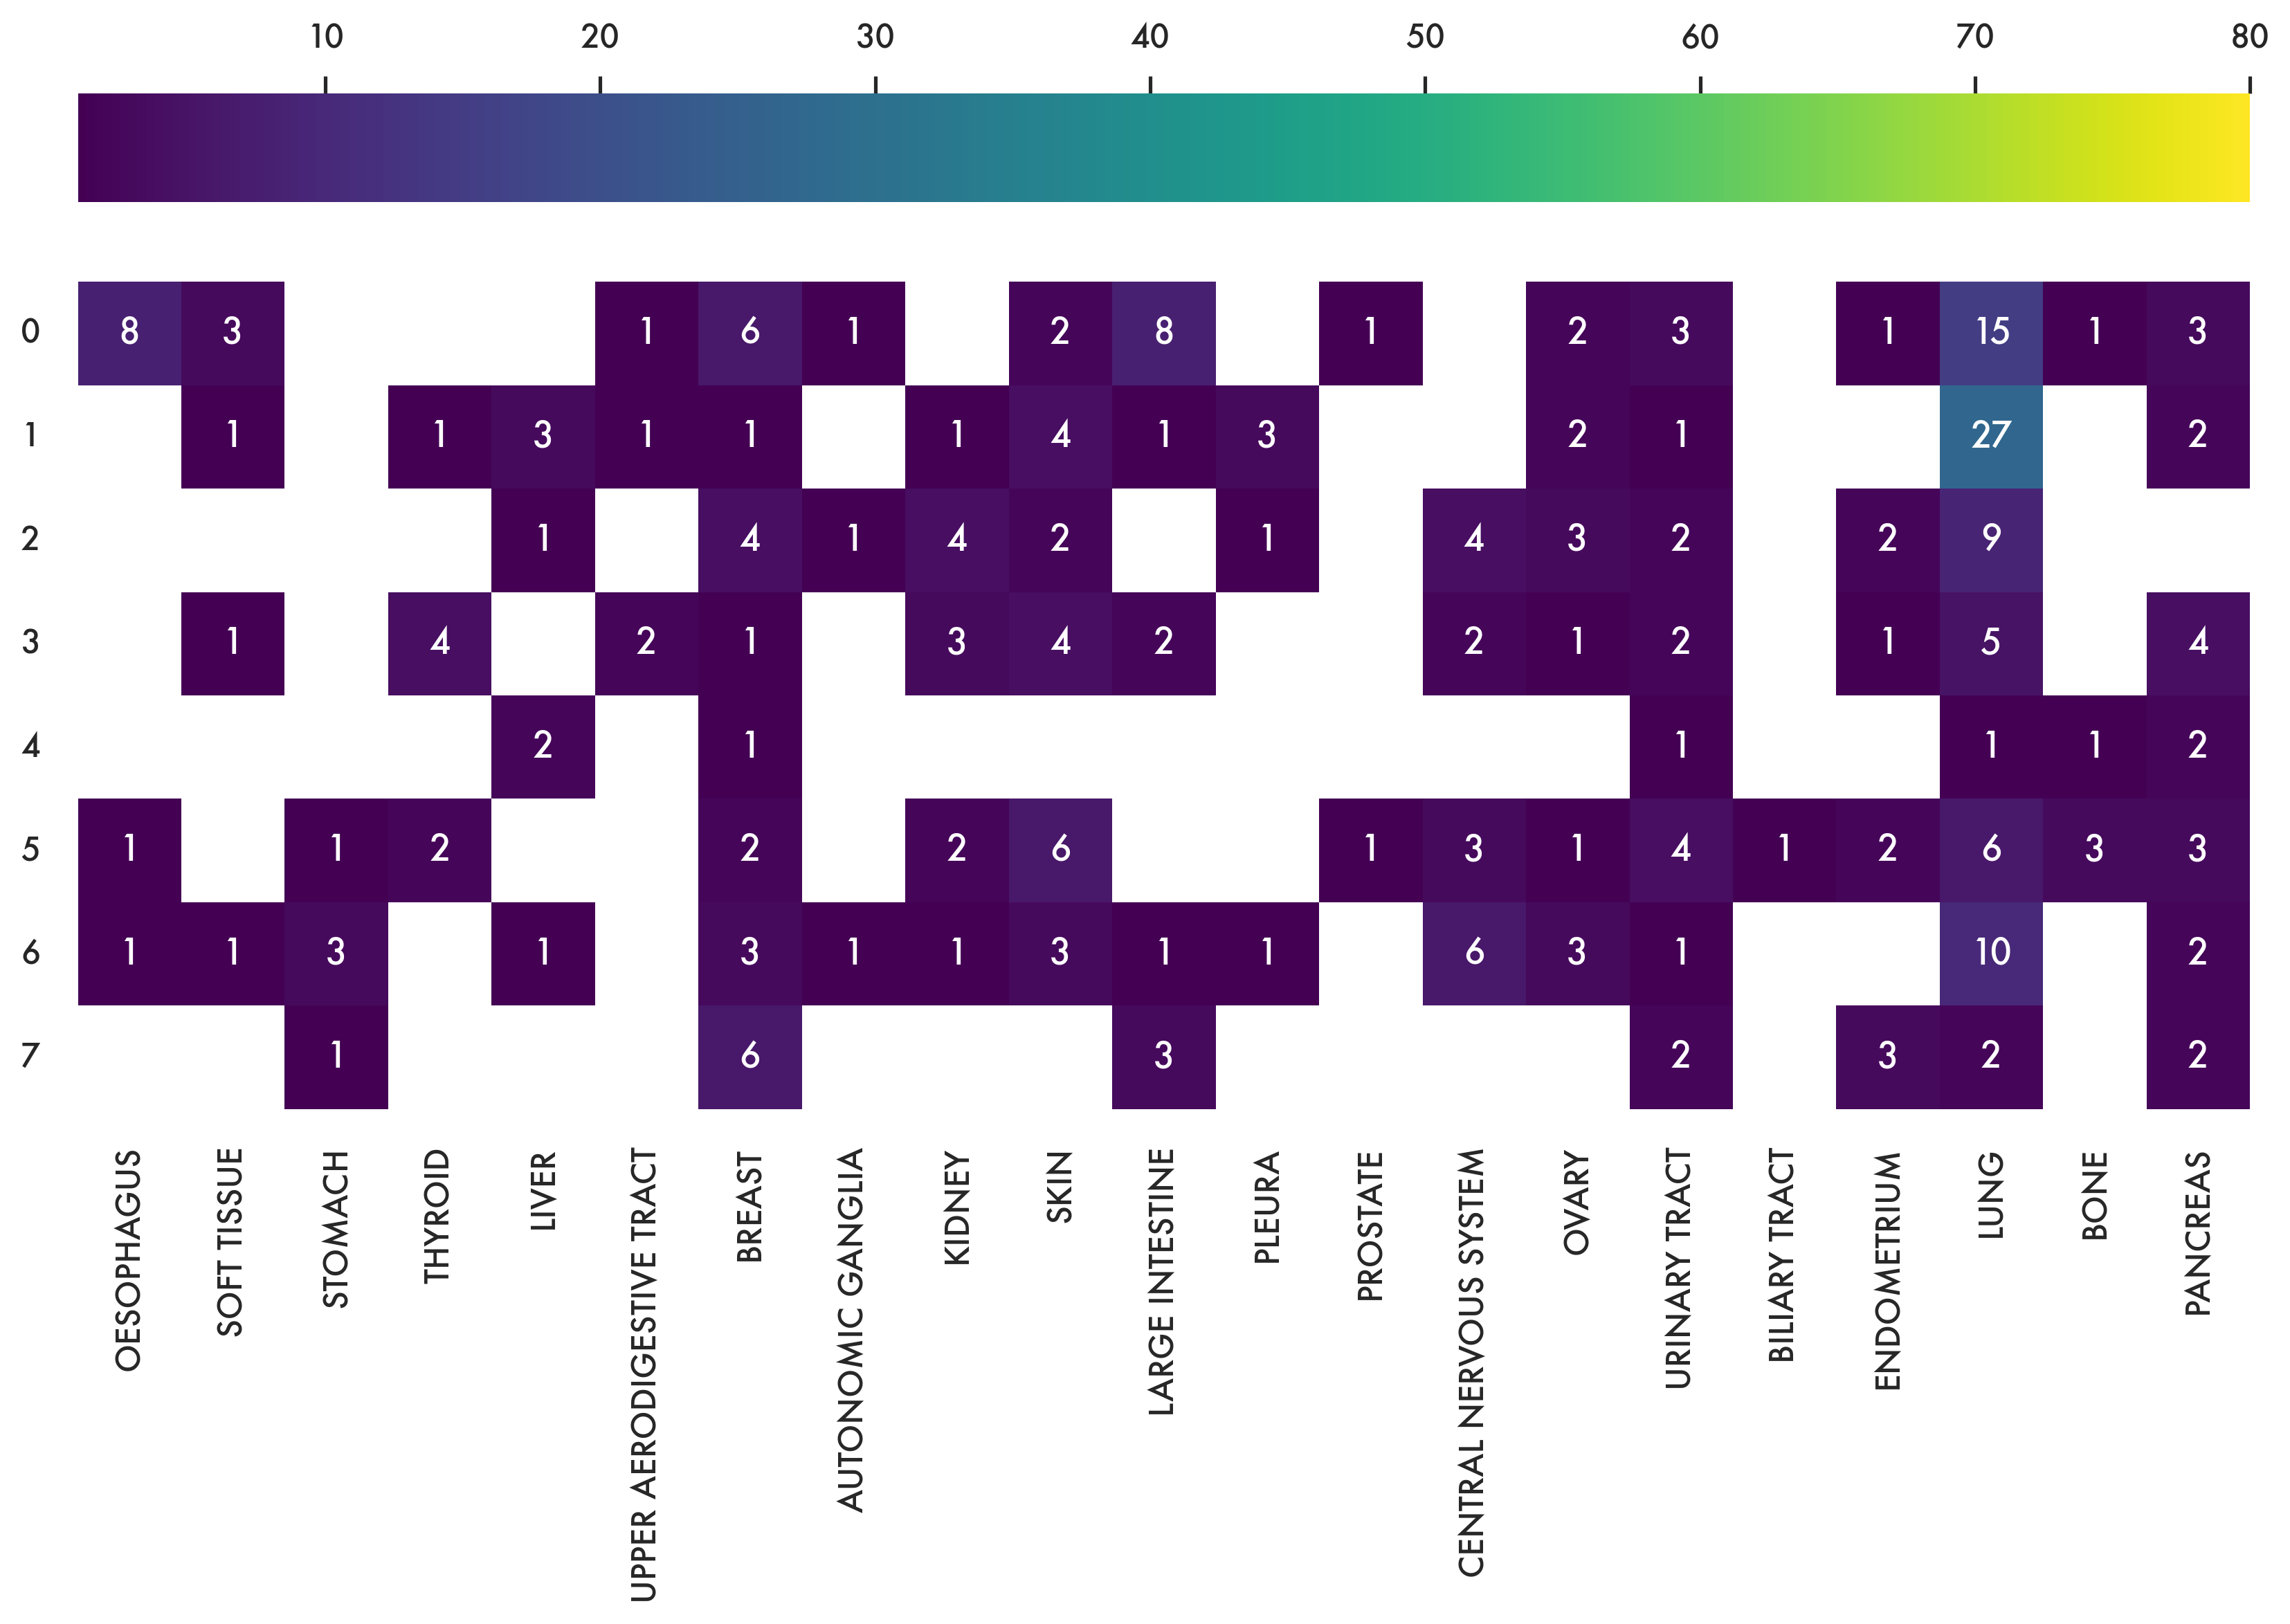

In [41]:
fig,ax = plt.subplots()
cluster_dist_mask = cluster_dist == 0
sns.heatmap(data = cluster_dist.transpose(), cmap = "viridis", annot = True, square = True, mask = cluster_dist_mask.transpose(), vmax = 80, cbar_kws = {"location":"top"})
ax.set_facecolor(color = "white")
ax.tick_params(axis='y', rotation=360)
ax.tick_params(axis='x', rotation=90)





**Plot PC2, PC3 with cluster and tissue type**

/Users/tcong/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


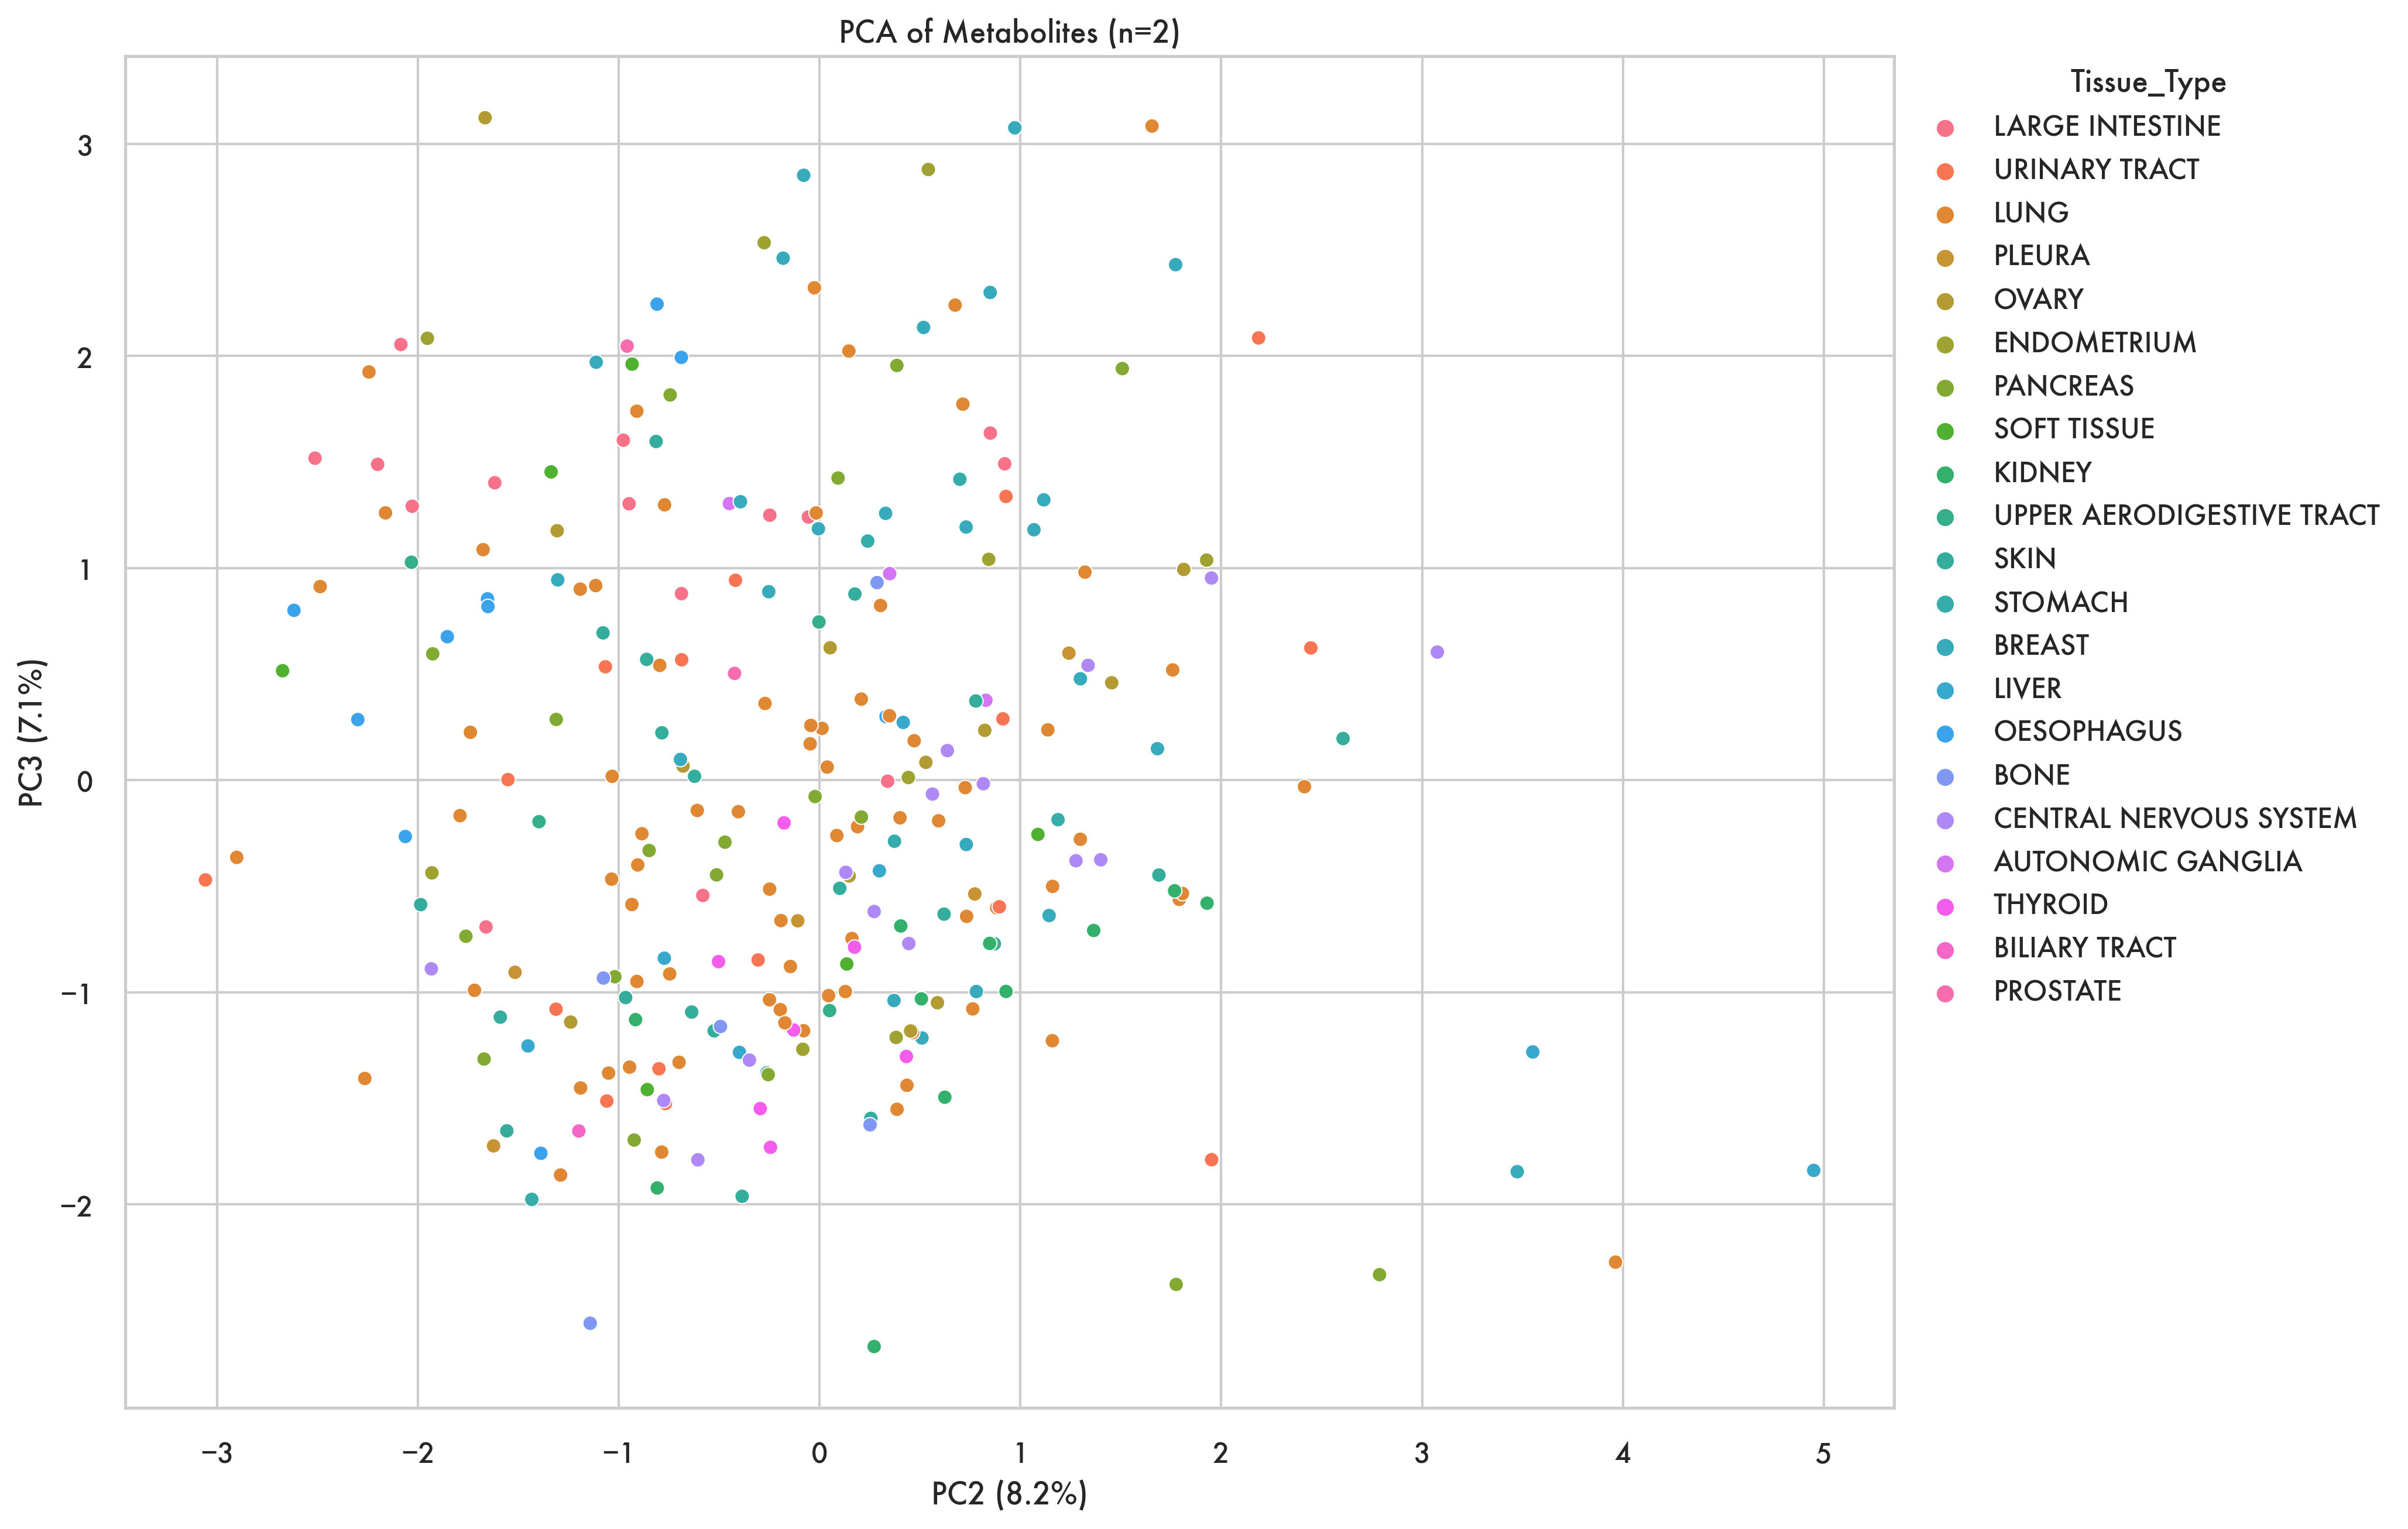

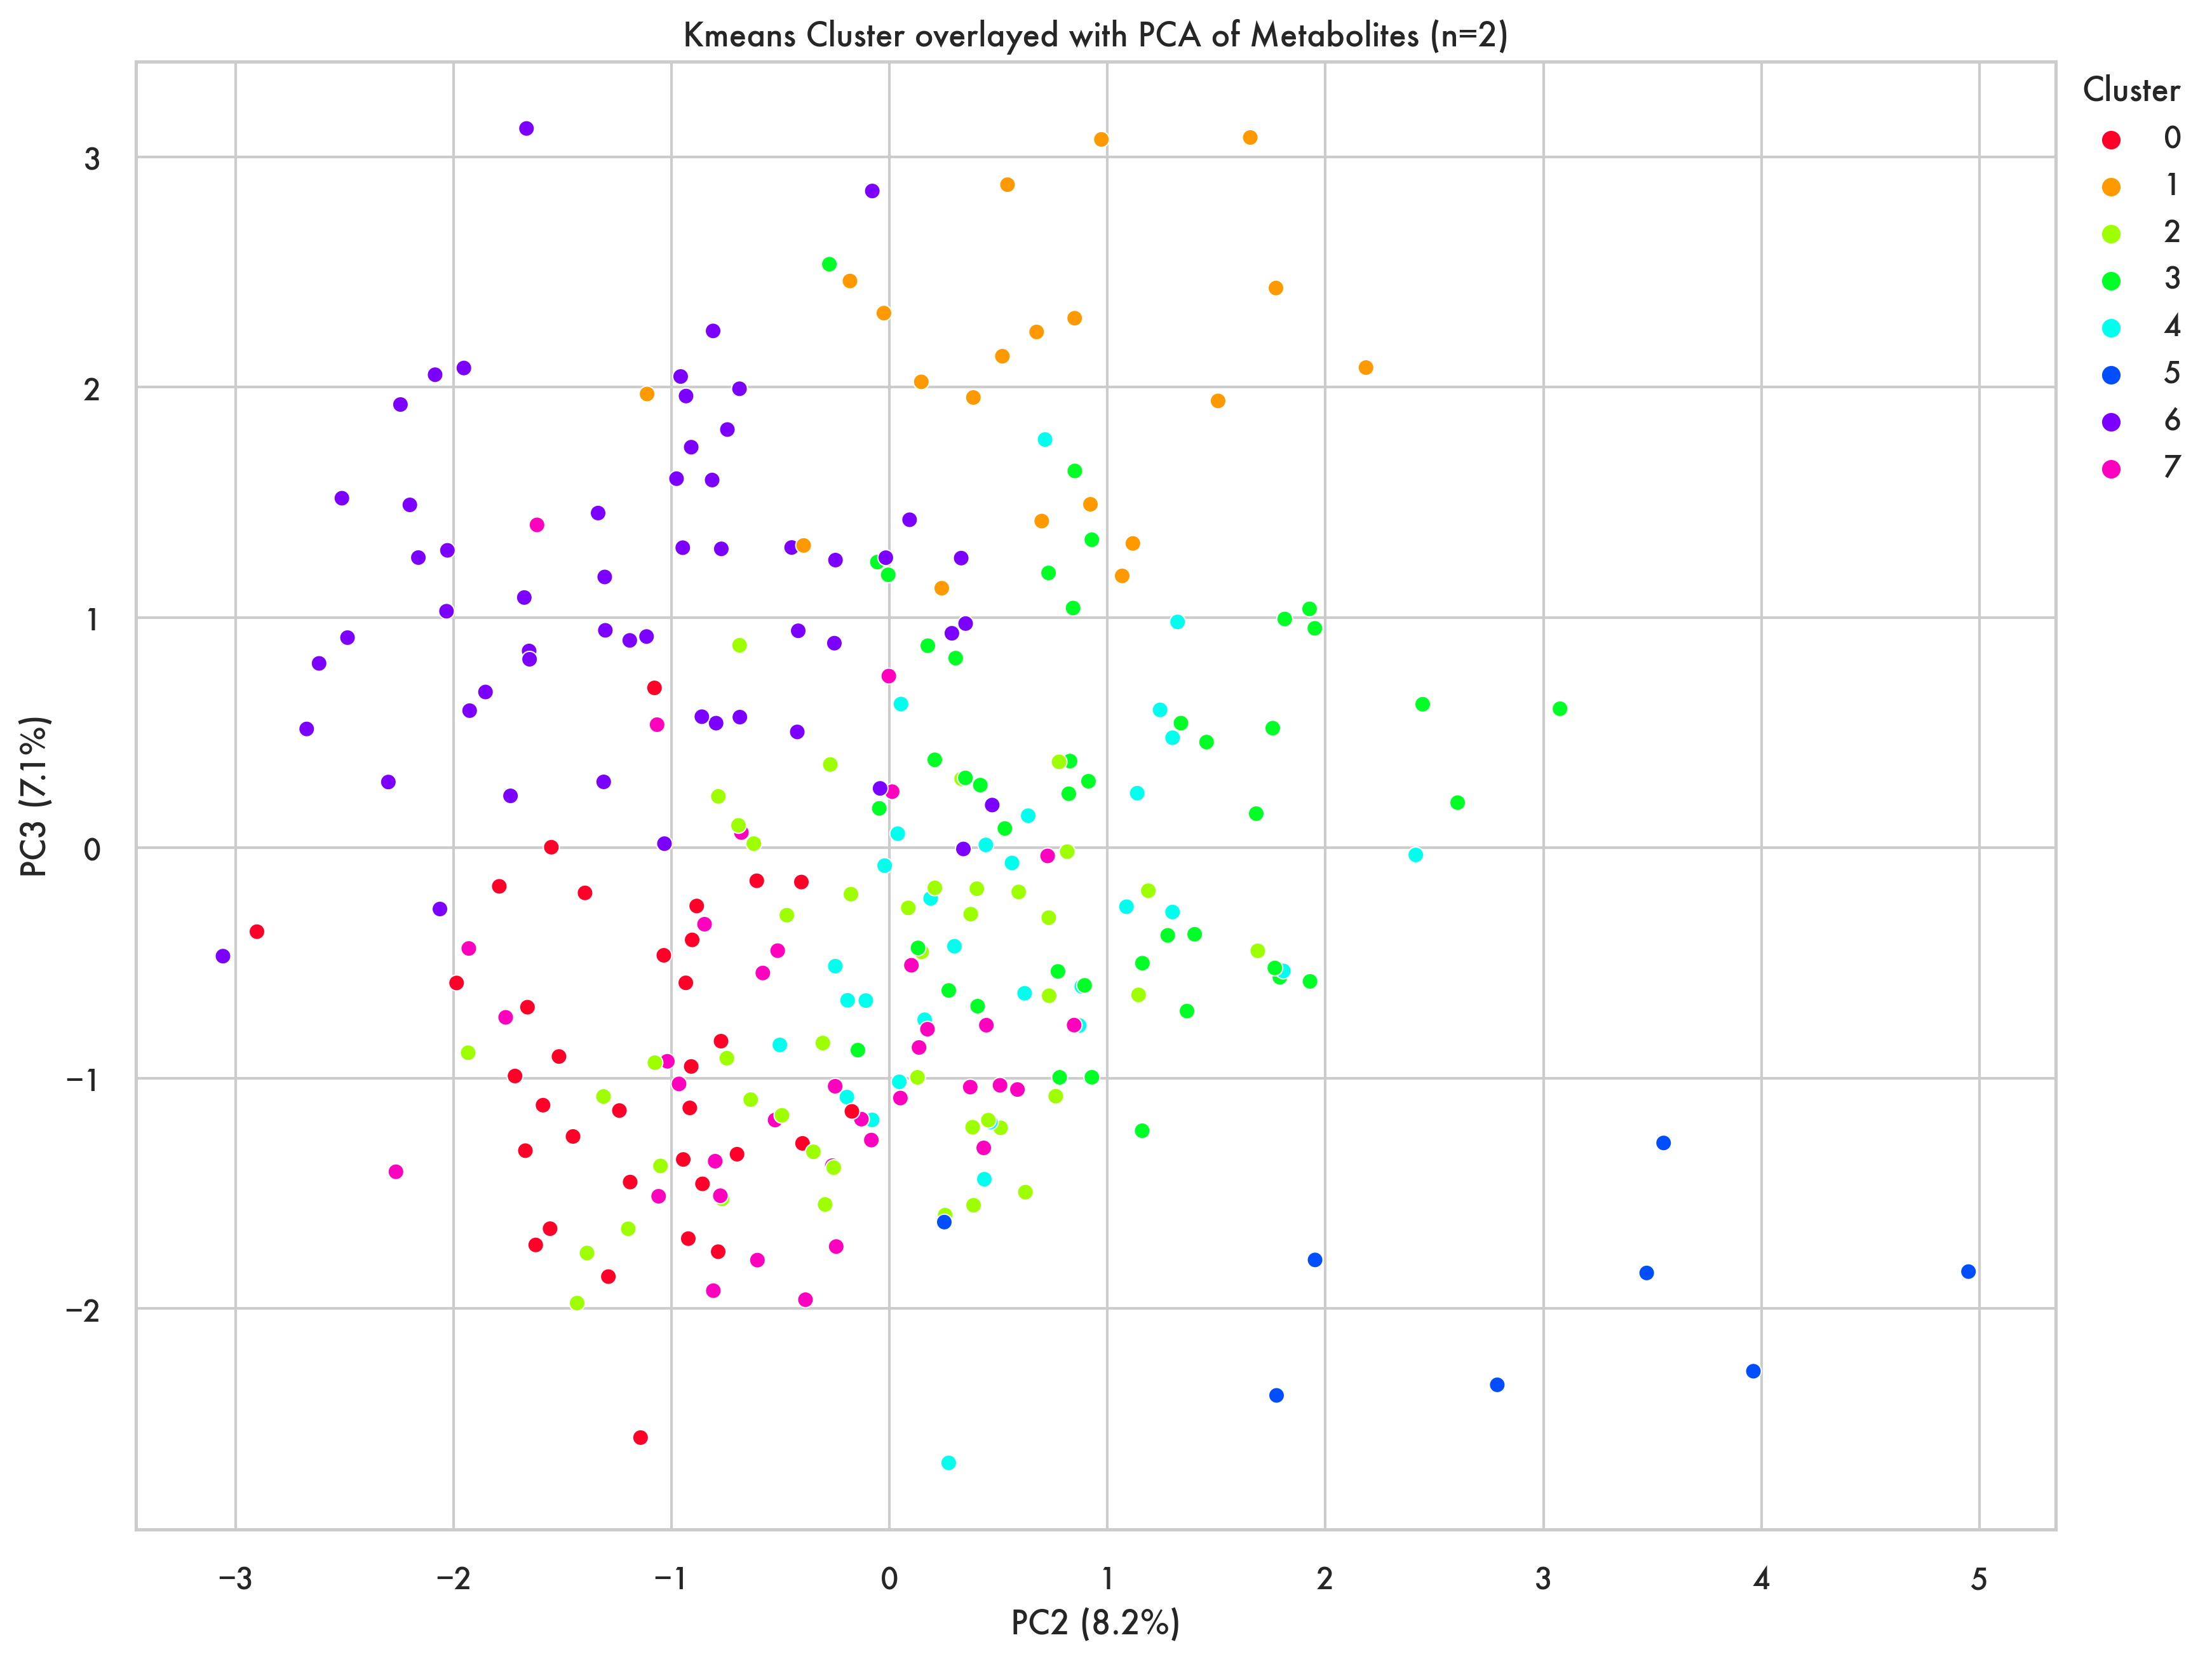

In [42]:
from sklearn.decomposition import PCA
sns.set_theme(style = "whitegrid", rc={'figure.figsize':(13,10),"figure.dpi":300, 'savefig.dpi':300, "font.family":"Futura"})
fig,axpca = plt.subplots()
scatter = sns.scatterplot(x = "PC2", y = "PC3", data=metabolism_data_sub,hue = "Tissue_Type", sizes= 12).set(title = "PCA of Metabolites (n=2)")
axpca.set(xlabel='PC2 ({}%)'.format(round(explained_variance[1]*100, 1)), ylabel='PC3 ({}%)'.format(round(explained_variance[2]*100, 1)))
sns.move_legend(axpca,"upper left", bbox_to_anchor=(1, 1.01))
figure = axpca.get_figure()

clusters = visualizer.n_clusters_
kmeans = KMeans(n_clusters= clusters)
kmeans.fit(metabolism_data_silhouette)
y_kmeans = kmeans.predict(metabolism_data_silhouette)

metabolism_data_sub["Cluster"] = kmeans.labels_
fig,ax = plt.subplots()
scatter = sns.scatterplot(x = "PC2", y = "PC3", data=metabolism_data_sub, sizes= 12, hue = "Cluster",legend = "full", palette = "gist_rainbow").set(title = "Kmeans Cluster overlayed with PCA of Metabolites (n=2)")
ax.set(xlabel='PC2 ({}%)'.format(round(explained_variance[1]*100, 1)), ylabel='PC3 ({}%)'.format(round(explained_variance[2]*100, 1)))
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1.01))



In [91]:
listOflist = []
for tissue in metabolism_data.Tissue_Type.unique():
    listOflist.append(metabolism_data.loc[metabolism_data.Tissue_Type == tissue]["PC5"].values)

In [101]:
listOflist = []
for tissue in metabolism_data_sub.Media.unique():
    listOflist.append(metabolism_data_sub.loc[metabolism_data_sub.Media == tissue]["PC5"].values)

In [102]:
import scipy
scipy.stats.f_oneway(*listOflist)

F_onewayResult(statistic=12.634633924154777, pvalue=2.2219495340098406e-23)